<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_kmeans_walkforward_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `Protocol Buffer Fix (for TensorFlow)'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.30.2 which is incompatible.
google-cloud-firestore 2.20.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.2 which is incompatible.
google-ai-generative

In [2]:
!pip install tensorflow

In [3]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [5]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#Version Checks
print("Library Versions")
print("--------------------")
print("PyTorch:", torch.__version__)
print("CUDA:", torch.version.cuda)
print("cuDF:", cudf.__version__)
print("cuML:", cuml.__version__)
print("Dask:", dask.__version__)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("LightGBM:", lgb.__version__)
print("Gymnasium:", gym.__version__)
print("Stable Baselines3:", stable_baselines3.__version__)

#GPU Check (Torch + NVIDIA)
print("\nGPU Availability")
print("--------------------")
print("PyTorch GPU Available:", torch.cuda.is_available())
print("GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Library Versions
--------------------
PyTorch: 2.6.0+cu124
CUDA: 12.4
cuDF: 25.02.01
cuML: 25.02.01
Dask: 2024.12.1
Pandas: 2.2.2
NumPy: 2.0.2
SciPy: 1.14.1
LightGBM: 4.5.0
Gymnasium: 1.1.1
Stable Baselines3: 2.6.0

GPU Availability
--------------------
PyTorch GPU Available: False
GPU Count: 0


In [6]:
#Core Libraries
import gc
import json
import os
import pickle
import sys
import time
from collections import defaultdict, deque
from datetime import datetime

#Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba
import IPython.display as display

#Machine Learning & Data Processing
import joblib
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler

#Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

#RAPIDS Libraries (cuDF & cuML for GPU acceleration)
import cupy as cp

#Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

#Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit
from gym_anytrading.envs import StocksEnv

#Financial & Stock Data Libraries
import yfinance as yf

#PyTorch Essentials
import torch
import torch.nn as nn
import torch.optim as optim


In [7]:
#Set CUDA Paths (Ensuring GPU Utilization)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [8]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [9]:
#Ticker list
TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

ANALYZE_METHODS = True
anomaly_eval_summary = []

import yfinance as yf
import time

def download_data(ticker, retries=3, sleep_time=5):
    for attempt in range(retries):
        try:
            df = yf.download(ticker, period="720d", interval="1h", progress=False)
            if not df.empty:
                df.reset_index(inplace=True)
                return df
        except Exception as e:
            print(f"Error downloading {ticker} (Attempt {attempt + 1}): {e}")
        time.sleep(sleep_time)
    print(f"Failed to download {ticker} after {retries} attempts.")
    return None



In [10]:
#Utility Functions

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]


def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))


def compute_technical_indicators(df):
    """
    Applies technical indicators including RSI, MACD, Bollinger Bands, Stochastic Oscillator,
    OBV, CCI, momentum, trend, and volatility indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100

    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df


def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError("'Close' column is missing. Cannot generate trade labels.")

    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(
        df['Price_Change'] > buy_threshold, 1,
        np.where(df['Price_Change'] < sell_threshold, -1, 0)
    )

    df.dropna(inplace=True)
    return df


def drop_low_importance_features(df, feature_importance_df, threshold=1.0):
    """
    Drops low-importance features based on a given threshold.
    """
    low_importance_features = feature_importance_df[
        feature_importance_df['importance'] < threshold
    ]['feature'].tolist()

    if low_importance_features:
        df.drop(columns=low_importance_features, inplace=True)
        print(f"Dropped low-importance features: {low_importance_features}")
    else:
        print("No low-importance features found to drop.")

    return df


In [12]:
#Ticker list
TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

ANALYZE_METHODS = True
anomaly_eval_summary = []

import yfinance as yf
import time

def download_data(ticker, retries=3, sleep_time=5):
    for attempt in range(retries):
        try:
            df = yf.download(ticker, period="720d", interval="1h", progress=False)
            if not df.empty:
                df.reset_index(inplace=True)
                return df
        except Exception as e:
            print(f"Error downloading {ticker} (Attempt {attempt + 1}): {e}")
        time.sleep(sleep_time)
    print(f"Failed to download {ticker} after {retries} attempts.")
    return None



In [13]:
#Utility Functions

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]


def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))


def compute_technical_indicators(df):
    """
    Applies technical indicators including RSI, MACD, Bollinger Bands, Stochastic Oscillator,
    OBV, CCI, momentum, trend, and volatility indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100

    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df


def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError("'Close' column is missing. Cannot generate trade labels.")

    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(
        df['Price_Change'] > buy_threshold, 1,
        np.where(df['Price_Change'] < sell_threshold, -1, 0)
    )

    df.dropna(inplace=True)
    return df


def drop_low_importance_features(df, feature_importance_df, threshold=1.0):
    """
    Drops low-importance features based on a given threshold.
    """
    low_importance_features = feature_importance_df[
        feature_importance_df['importance'] < threshold
    ]['feature'].tolist()

    if low_importance_features:
        df.drop(columns=low_importance_features, inplace=True)
        print(f"Dropped low-importance features: {low_importance_features}")
    else:
        print("No low-importance features found to drop.")

    return df


In [26]:
imrt numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as SKLearnKMeans
import os
import joblib
import json

#Try cuML KMeans if available
try:
    from cl.cluster import KMeans as cuKMeans   USE_CUML = True
except:
    print("cuML not available. Falling back to scikit-learn KMeans.")
    USE_CUML = False

#Walkforward KMeans
def walkforward_kmeans(, n_clusters, test_size=0.2):
    df = df.copy()
    split_idx = int(len(df) * (1 - test_size))
    train_df = df.iloc[:spt_idx].copy()
    test_df = df.iloc[split_idx:].copy()

    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[['RSI', 'MACD', BV']])
    X_test = scaler.transform(test_df[['RSI', 'MACD', 'OBV']])

    kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    test_df['cluste] = kmeans.predict(X_test)

    #Signal Mappi (basic)
    cluster_perf = test_df.groupby('cluster')['Close'].mean().sort_values()
    cluster_signal = {cluster: signal for cluster, signal in zip(cluster_perf.index, [1, 0, -1])}
    test_df['signal'] = test_df['cluster'].map(cluster_signal)

    test_df['return'] = test_df['Close'].pct_change().fillna(0)
    test_df['strategy'] = test_df['signal'].shift(1).fillna(0) * test_df['return']
    test_df['cumulative_market'] = (1 + test_df['return']).cumprod()
    test_df['cumulative_strategy'] = (1 + test_df['strategy']).cumprod()

    stats = {
        "Final Market": test_df['lative_market'].iloc[-1],
    "Final Strategy": test_df['cumulative_stragy'].iloc[-1],
        "Sharpe": test_df['strategy'].mean() / (test_df['strategy'].std() + 1e-6) * np.sqrt(252),
        "Drawdown": (test_df['cumulative_strategy'].cummax() - test_df['cumulative_strategy']).max()
    }

    return stats, test_df, kmeans

#Save results
def save_kmeans_results(stock, model, result_df, final_portfolio_value, kmeans_sharpe, kmeans_drawdown, signal_map, directory="results/kmeans_lkforward"):
    os.makedirs(f"{directory}/models", exist_ok=True)
    os.makedirs(f"{directory}/data", exist_ok=True)
    os.makedirs(f"{directory}/signals", exist_ok=True)

    joblib.dump(model, f"{directory}/models/{stock}_kmes_model.pkl")
    result_df.to_csv(f"{directory}/data/{stock}_result.csv", index=False)
    with open(f"{directory}/signals/{stock}_signal_map.json", "w") as f:
        json.dump(signal_map, f, indent=4)

    summary_row = {
        "Ticker": stock,
        "Final Portfolio Value": final_portfolio_value,
        "Sharpe": kmeans_sharpe,
        "Drawdown": kmeans_drawdown
    }

    summary_path = f"{directory}/summary_kmeans_saved.csv"
    if os.path.exists(summary_path):
        summary_df = pd.read_csv(summary_path)
        summary_df = summary_df[summary_df["Ticker"] != stock]
        summary_df = pd.concat([summary_df, pd.DataFrame([summary_row])], ignore_index=Tru
    else:
        summary_df = pd.DataFrame([summary_row])

    summary_df.to_csv(summary_path, index=False)
    print(f"Saved KMeans model and results for {stock}")

#Main Loop
summary = []
for ticker  TICKERS:
    print(f"\nProcessing {ticker}")
    df = downlo_data(ticker)
    if df is None or df.empty or len(df) < 100:
        continue

    df = compute_technical_indicators(df)
    stats, result_df, kmeans = walkforward_kmeans(df)

    #Add forward return signal mapping
    result_df['Forward_Return'] = result_df['Close'].pct_change(periods=10).shift(-10)
    cluster_returns = result_df.groupby('cluster')['Forward_Return'].mean().sort_values(ascending=False)
    labels = ['Buy', 'Hold', 'Sell']
    signal_map = {cluster: labels[i] if i < len(labels) else 'Hold' for i, cluster in enumerate(cluster_returns.index)}
    result_df['signal'] = result_df['cluster'].map(signal_map)

    #Simulate trading
    initial_balance = 100000
    balance = initial_balance
    position = 0
    portfolio_values = []

    for i in range(len(result_df)):
        price = result_df.iloc[i]['Close']
        signal = result_df.iloc[i]['signal']
        if signal == 'Buy' and balance > 0:
            position = balance / price
            balance = 0
        elif signal == 'Sell' and position > 0:
            balance = position * price
            position = 0
        portfolio_values.append(balance if balance > 0 else position * price)

    result_df['Portfolio_Value'] = portfolio_values
    final_portfolio_value = portfolio_values[-1]

    stats['Ticker'] = ticker
    stats['Final Portfolio Vae'] = final_portfolio_value
    stats['Signal Map'] = signal_map
    summary.append(stats)

    save_kmeans_results(
        stock=ticker,
        model=kmeans,
        result_df=result_df,
        final_portfolio_value=final_portfolio_value,
        kmeans_shpe=stats["Sharpe"],
        kmeans_drawdown=stats["Drawdown"],
        signal_map=signal_ma    )

#Save final summary
summary_df = pd.DataFrame(summary)
os.makedirs("results/kmeans_walkforward", exist_ok=True)
summary_df.to_csv("results/kmeans_walkforward/summary_forward_return_remap.csv", index=False)
print("KMeans walkforward summary saved.")
print(summary_df.sort_values('Final Portfolio Value', ascending=False).head())



Processing AAPL
Saved KMeans model and results for AAPL

Processing TSLA
Saved KMeans model and results for TSLA

Processing MSFT
Saved KMeans model and results for MSFT

Processing GOOGL
Saved KMeans model and results for GOOGL

Processing AMZN
Saved KMeans model and results for AMZN

Processing NVDA
Saved KMeans model and results for NVDA

Processing META
Saved KMeans model and results for META

Processing BRK-B
Saved KMeans model and results for BRK-B

Processing JPM
Saved KMeans model and results for JPM

Processing JNJ
Saved KMeans model and results for JNJ

Processing XOM
Saved KMeans model and results for XOM

Processing V
Saved KMeans model and results for V

Processing PG
Saved KMeans model and results for PG

Processing UNH
Saved KMeans model and results for UNH

Processing MA
Saved KMeans model and results for MA

Processing HD
Saved KMeans model and results for HD

Processing LLY
Saved KMeans model and results for LLY

Processing MRK
Saved KMeans model and results for MRK


In [27]:
import os
import numpy as np
import pandas as pd

#Create output folder
os.makedirs("results/kmeans_walkforward", exist_ok=True)

summary = []
top_portfolios = {}

for ticker in TICKERS:
    print(f"\ncessing {ticker}")
    df = download_data(ticker)
    if df is None or df.empty or len(df) < 100:
        continue

    df = compute_technical_indicators(df)

    #Run walkforward KMeans
    stats, result_df, kmeans = walkforward_kmeans(df)

    #Add Forward Return and dynamic signal mapping
    result_df['Forward_Return'] = result_df['Close'].pct_change(periods=10).shift(-10)
    cluster_returns = result_df.groupby('cluster')['Forward_Return'].mean().sort_values(ascending=False)
    labels = ['Buy', 'Hold', 'Sell']
    signal_map = {cluster: labels[i] if i < len(labels) else 'Hold'
                  for i, cluster in enumerate(cluster_returns.index)}
    result_df['signal'] = result_df['cluster'].map(signal_map)

    #Simulate trading logic
    initial_balance = 100000
    balance = initial_balance
    position = 0
    portfolio_values = []

    for i in range(len(result_df)):
        price = result_df.iloc[i]['Close']
        signal = result_df.iloc[i]['signal']
        if signal == 'Buy' and balance > 0:
            position = balance / price
            balance = 0
        elif signal == 'Sell' and position > 0:
            balance = position * price
            position = 0
        portfolio_values.append(balance if balance > 0 else position * price)

    result_df['Portfolio_Value'] = portfolio_values
    final_portfolio_value = portfolio_values[-1]

    #Save result and collect stats
    stats['Ticker'] = ticker
    stats['Final Portfolio Value'] = final_portfolio_value
    stats['Signal Map'] = signal_map
    summary.append(stats)

    #Optionally store for plotting
    top_portfolios[ticker] = result_df[['Portfolio_Value']].copy()

    #Save individual result CSV
    result_df.to_csv(f"results/kmeans_walkforward/{ticker}_walkforward.csv", index=False)

#Save summary
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values('Final Portfolio Value', ascending=False)
summary_df.to_csv("results/kmeans_walkforward/summary_forward_return_remap.csv", index=False)

print("\nSummary with forward return signal mapping saved.")
print(summary_df[['Ticker', 'Final Strategy', 'Final Portfolio Value', 'Sharpe', 'Drawdown']].head())



📊 Processing AAPL

📊 Processing TSLA

📊 Processing MSFT

📊 Processing GOOGL

📊 Processing AMZN

📊 Processing NVDA

📊 Processing META

📊 Processing BRK-B

📊 Processing JPM

📊 Processing JNJ

📊 Processing XOM

📊 Processing V

📊 Processing PG

📊 Processing UNH

📊 Processing MA

📊 Processing HD

📊 Processing LLY

📊 Processing MRK

📊 Processing PEP

📊 Processing KO

📊 Processing BAC

📊 Processing ABBV

📊 Processing AVGO

📊 Processing PFE

📊 Processing COST

📊 Processing CSCO

📊 Processing TMO

📊 Processing ABT

📊 Processing ACN

📊 Processing WMT

📊 Processing MCD

📊 Processing ADBE

📊 Processing DHR

📊 Processing CRM

📊 Processing NKE

📊 Processing INTC

📊 Processing QCOM

📊 Processing NEE

📊 Processing AMD

📊 Processing TXN

📊 Processing AMGN

📊 Processing UPS

📊 Processing LIN

📊 Processing PM

📊 Processing UNP

📊 Processing BMY

📊 Processing LOW

📊 Processing RTX

📊 Processing CVX

📊 Processing IBM

📊 Processing GE

📊 Processing SBUX

📊 Processing ORCL

✅ Summary with forward return sig

In [38]:
import os
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as SKLearnKMeans
from IPython.display import Image, display
import yfinance as yf

#========== Updated walkforward_kmeans to return `kmeans` ==========
def walkforward_kmeans(df, n_clusters=3, test_size=0.2):
    df = df.copy()
    split_idx = int(len(df) * (1 - test_size))
    train_df = df.iloc[:split_idx].copy()
    test_df = df.iloc[split_idx:].copy()

    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[['RSI', 'MACD', 'OBV']])
    X_test = scaler.transform(test_df[['RSI', 'MACD', 'OBV']])

    kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    test_df['cluster'] = kmeans.predict(X_test)

    test_df['return'] = test_df['Close'].pct_change().fillna(0)
    test_df['strategy'] = test_df['cluster'].shift(1).fillna(0) * test_df['return']
    test_df['cumulative_market'] = (1 + test_df['return']).cumprod()
    test_df['cumulative_strategy'] = (1 + test_df['strategy']).cumprod()

    stats = {
        "Final Market": test_df['cumulative_market'].iloc[-1],
        "Final Strategy": test_df['cumulative_strategy'].iloc[-1],
        "Sharpe": test_df['strategy'].mean() / (test_df['strategy'].std() + 1e-6) * np.sqrt(252),
        "Drawdown": (test_df['cumulative_strategy'].cummax() - test_df['cumulative_strategy']).max()
    }

    return stats, test_df, kmeans  #returning model

#========== Updated save_kmeans_results with return output ==========
def save_kmeans_results(
    stock,
    model,
    result_df,
    final_portfolio_value,
    kmeans_sharpe,
    kmeans_drawdown,
    signal_map,
    directory="results/kmeans_walkforward"
):
    os.makedirs(f"{directory}/models", exist_ok=True)
    os.makedirs(f"{directory}/data", exist_ok=True)
    os.makedirs(f"{directory}/signals", exist_ok=True)

    model_path = f"{directory}/models/{stock}_kmeans_model.pkl"
    joblib.dump(model, model_path)

    result_path = f"{directory}/data/{stock}_result.csv"
    result_df.to_csv(result_path, index=False)

    signal_map_path = f"{directory}/signals/{stock}_signal_map.json"
    with open(signal_map_path, "w") as f:
        json.dump(signal_map, f, indent=4)

    summary_row = {
        "Ticker": stock,
        "Final Portfolio Value": final_portfolio_value,
        "Sharpe": kmeans_sharpe,
        "Drawdown": kmeans_drawdown
    }

    summary_path = f"{directory}/summary_kmeans_saved.csv"
    if os.path.exists(summary_path):
        summary_df = pd.read_csv(summary_path)
        summary_df = summary_df[summary_df["Ticker"] != stock]
        summary_df = pd.concat([summary_df, pd.DataFrame([summary_row])], ignore_index=True)
    else:
        summary_df = pd.DataFrame([summary_row])

    summary_df.to_csv(summary_path, index=False)
    print(f"Saved KMeans results for {stock}")
    return {
        "ticker": stock,
        "model_path": model_path,
        "result_path": result_path,
        "signal_map_path": signal_map_path,
        "summary_path": summary_path,
        "saved": True
    }

#========== Core Execution Loop ==========
TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

def download_data(ticker, retries=3):
    for _ in range(retries):
        try:
            df = yf.download(ticker, period="720d", interval="1h", progress=False)
            if not df.empty:
                df.reset_index(inplace=True)
                return df
        except Exception as e:
            print(f"Error downloading {ticker}: {e}")
    return None

def compute_technical_indicators(df):
    df = df.copy()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

#========== Run KMeans for all tickers ==========
summary = []

for ticker in TICKERS:
    print(f"\nProcessing {ticker}")
    df = download_data(ticker)
    if df is None or df.empty or len(df) < 100:
        continue

    df = compute_technical_indicators(df)

    #Get walkforward stats + model
    stats, result_df, kmeans = walkforward_kmeans(df)

    #Remap signal dynamically
    result_df['Forward_Return'] = result_df['Close'].pct_change(periods=10).shift(-10)
    cluster_returns = result_df.groupby('cluster')['Forward_Return'].mean().sort_values(ascending=False)
    labels = ['Buy', 'Hold', 'Sell']
    signal_map = {cluster: labels[i] if i < len(labels) else 'Hold' for i, cluster in enumerate(cluster_returns.index)}
    result_df['signal'] = result_df['cluster'].map(signal_map)

    #Simulate trading
    initial_balance = 100000
    balance, position = initial_balance, 0
    portfolio_values = []

    for i in range(len(result_df)):
        price = result_df.iloc[i]['Close']
        signal = str(result_df.iloc[i]['signal'])
        if signal == 'Buy' and balance > 0:
            position = balance / price
            balance = 0
        elif signal == 'Sell' and position > 0:
            balance = position * price
            position = 0
        portfolio_values.append(balance if balance > 0 else position * price)

    result_df['Portfolio_Value'] = portfolio_values
    final_portfolio_value = portfolio_values[-1]


    #Append summary and save
    stats['Ticker'] = ticker
    stats['Final Portfolio Value'] = final_portfolio_value
    stats['Signal Map'] = signal_map
    summary.append(stats)

    save_kmeans_results(
        stock=ticker,
        model=kmeans,
        result_df=result_df,
        final_portfolio_value=final_portfolio_value,
        kmeans_sharpe=stats["Sharpe"],
        kmeans_drawdown=stats["Drawdown"],
        signal_map=signal_map
    )

#Save final combined summary
summary_df = pd.DataFrame(summary)
os.makedirs("results/kmeans_walkforward", exist_ok=True)
summary_df.to_csv("results/kmeans_walkforward/summary_forward_return_remap.csv", index=False)
print("\nFull KMeans summary saved.")
print(summary_df[['Ticker', 'Final Portfolio Value', 'Sharpe', 'Drawdown']].head())



📊 Processing AAPL
✅ Saved KMeans results for AAPL

📊 Processing TSLA
✅ Saved KMeans results for TSLA

📊 Processing MSFT
✅ Saved KMeans results for MSFT

📊 Processing GOOGL
✅ Saved KMeans results for GOOGL

📊 Processing AMZN
✅ Saved KMeans results for AMZN

📊 Processing NVDA
✅ Saved KMeans results for NVDA

📊 Processing META
✅ Saved KMeans results for META

📊 Processing BRK-B
✅ Saved KMeans results for BRK-B

📊 Processing JPM
✅ Saved KMeans results for JPM

📊 Processing JNJ
✅ Saved KMeans results for JNJ

📊 Processing XOM
✅ Saved KMeans results for XOM

📊 Processing V
✅ Saved KMeans results for V

📊 Processing PG
✅ Saved KMeans results for PG

📊 Processing UNH
✅ Saved KMeans results for UNH

📊 Processing MA
✅ Saved KMeans results for MA

📊 Processing HD
✅ Saved KMeans results for HD

📊 Processing LLY
✅ Saved KMeans results for LLY

📊 Processing MRK
✅ Saved KMeans results for MRK

📊 Processing PEP
✅ Saved KMeans results for PEP

📊 Processing KO
✅ Saved KMeans results for KO

📊 Processin

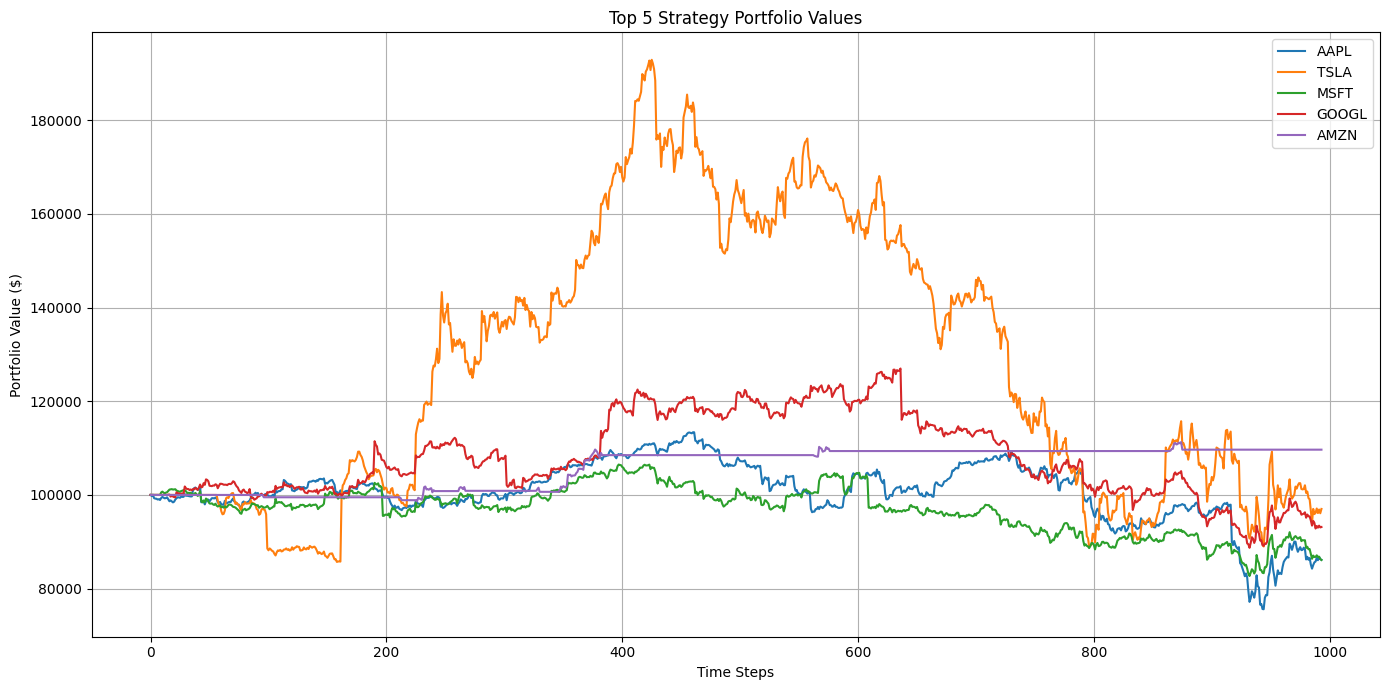

In [39]:
#Plot Top 5 Strategy Portfolio Values
plt.figure(figsize=(14, 7))
for ticker in summary_df.head(5)['Ticker']:
    plt.plot(top_portfolios[ticker].values, label=ticker)

plt.title("Top 5 Strategy Portfolio Values")
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

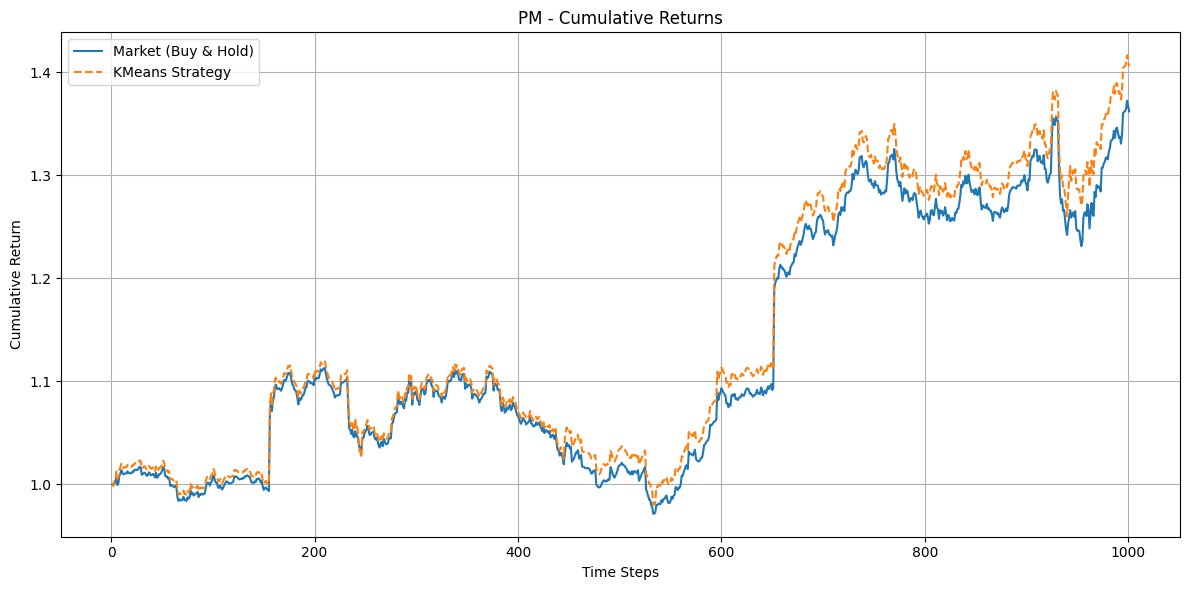

Plot saved for PM: results/kmeans_walkforward/plots/PM_portfolio_plot.png


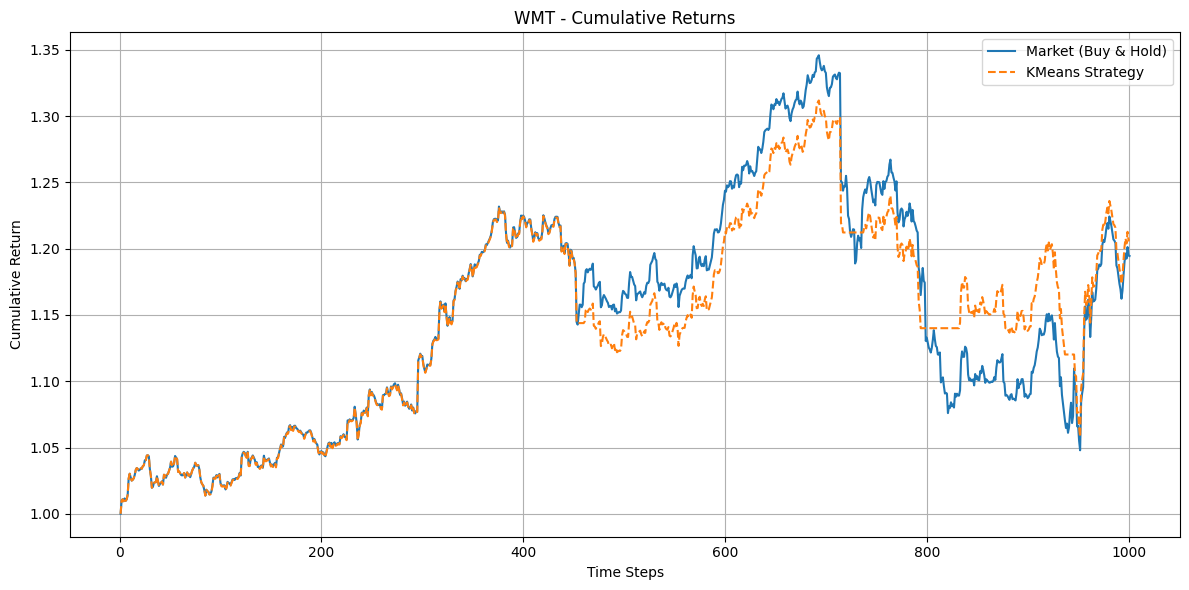

Plot saved for WMT: results/kmeans_walkforward/plots/WMT_portfolio_plot.png


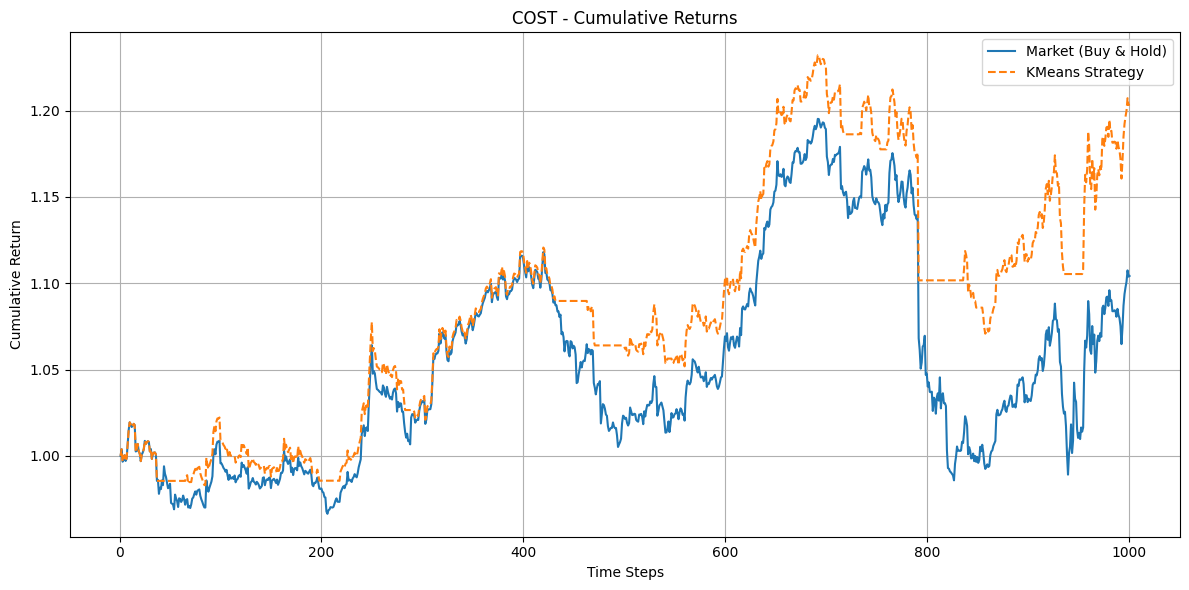

Plot saved for COST: results/kmeans_walkforward/plots/COST_portfolio_plot.png


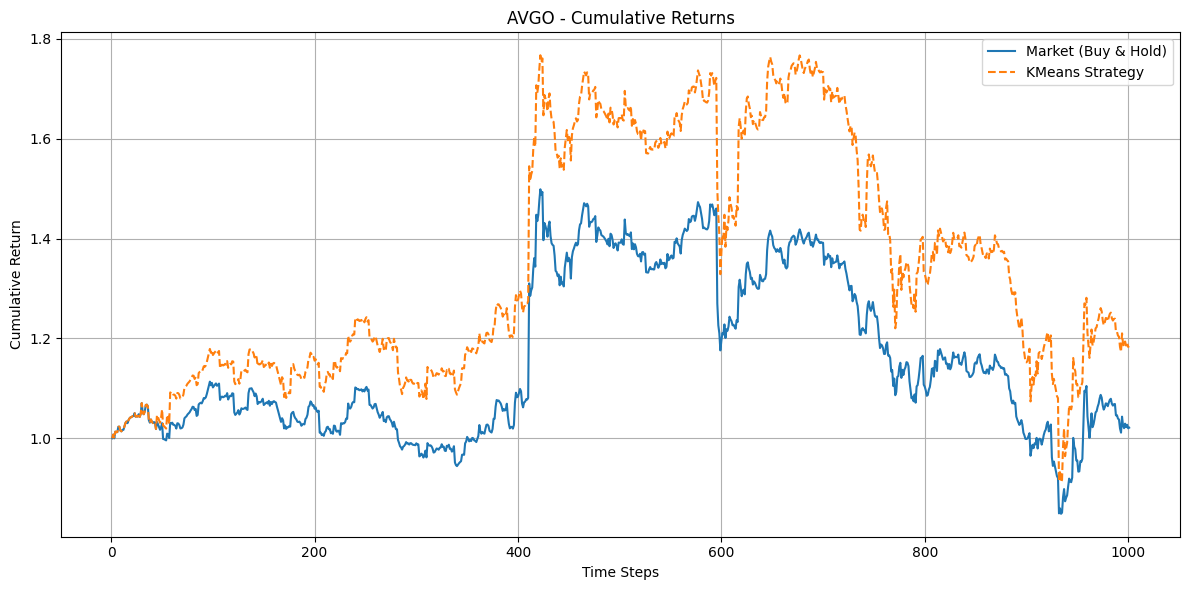

Plot saved for AVGO: results/kmeans_walkforward/plots/AVGO_portfolio_plot.png


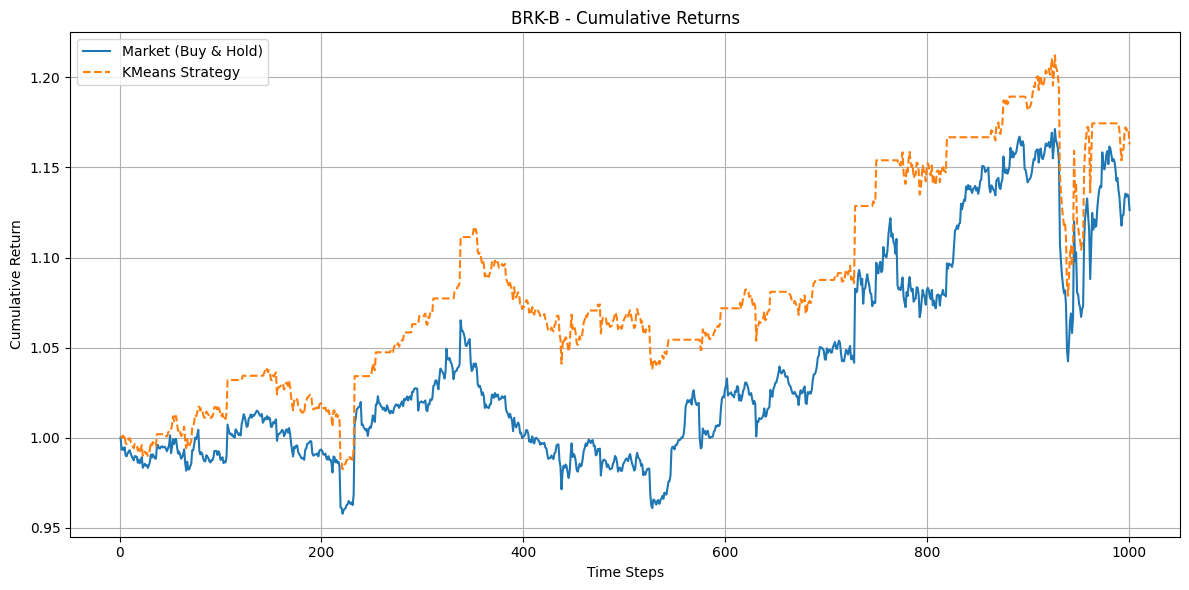

Plot saved for BRK-B: results/kmeans_walkforward/plots/BRK-B_portfolio_plot.png
 PM


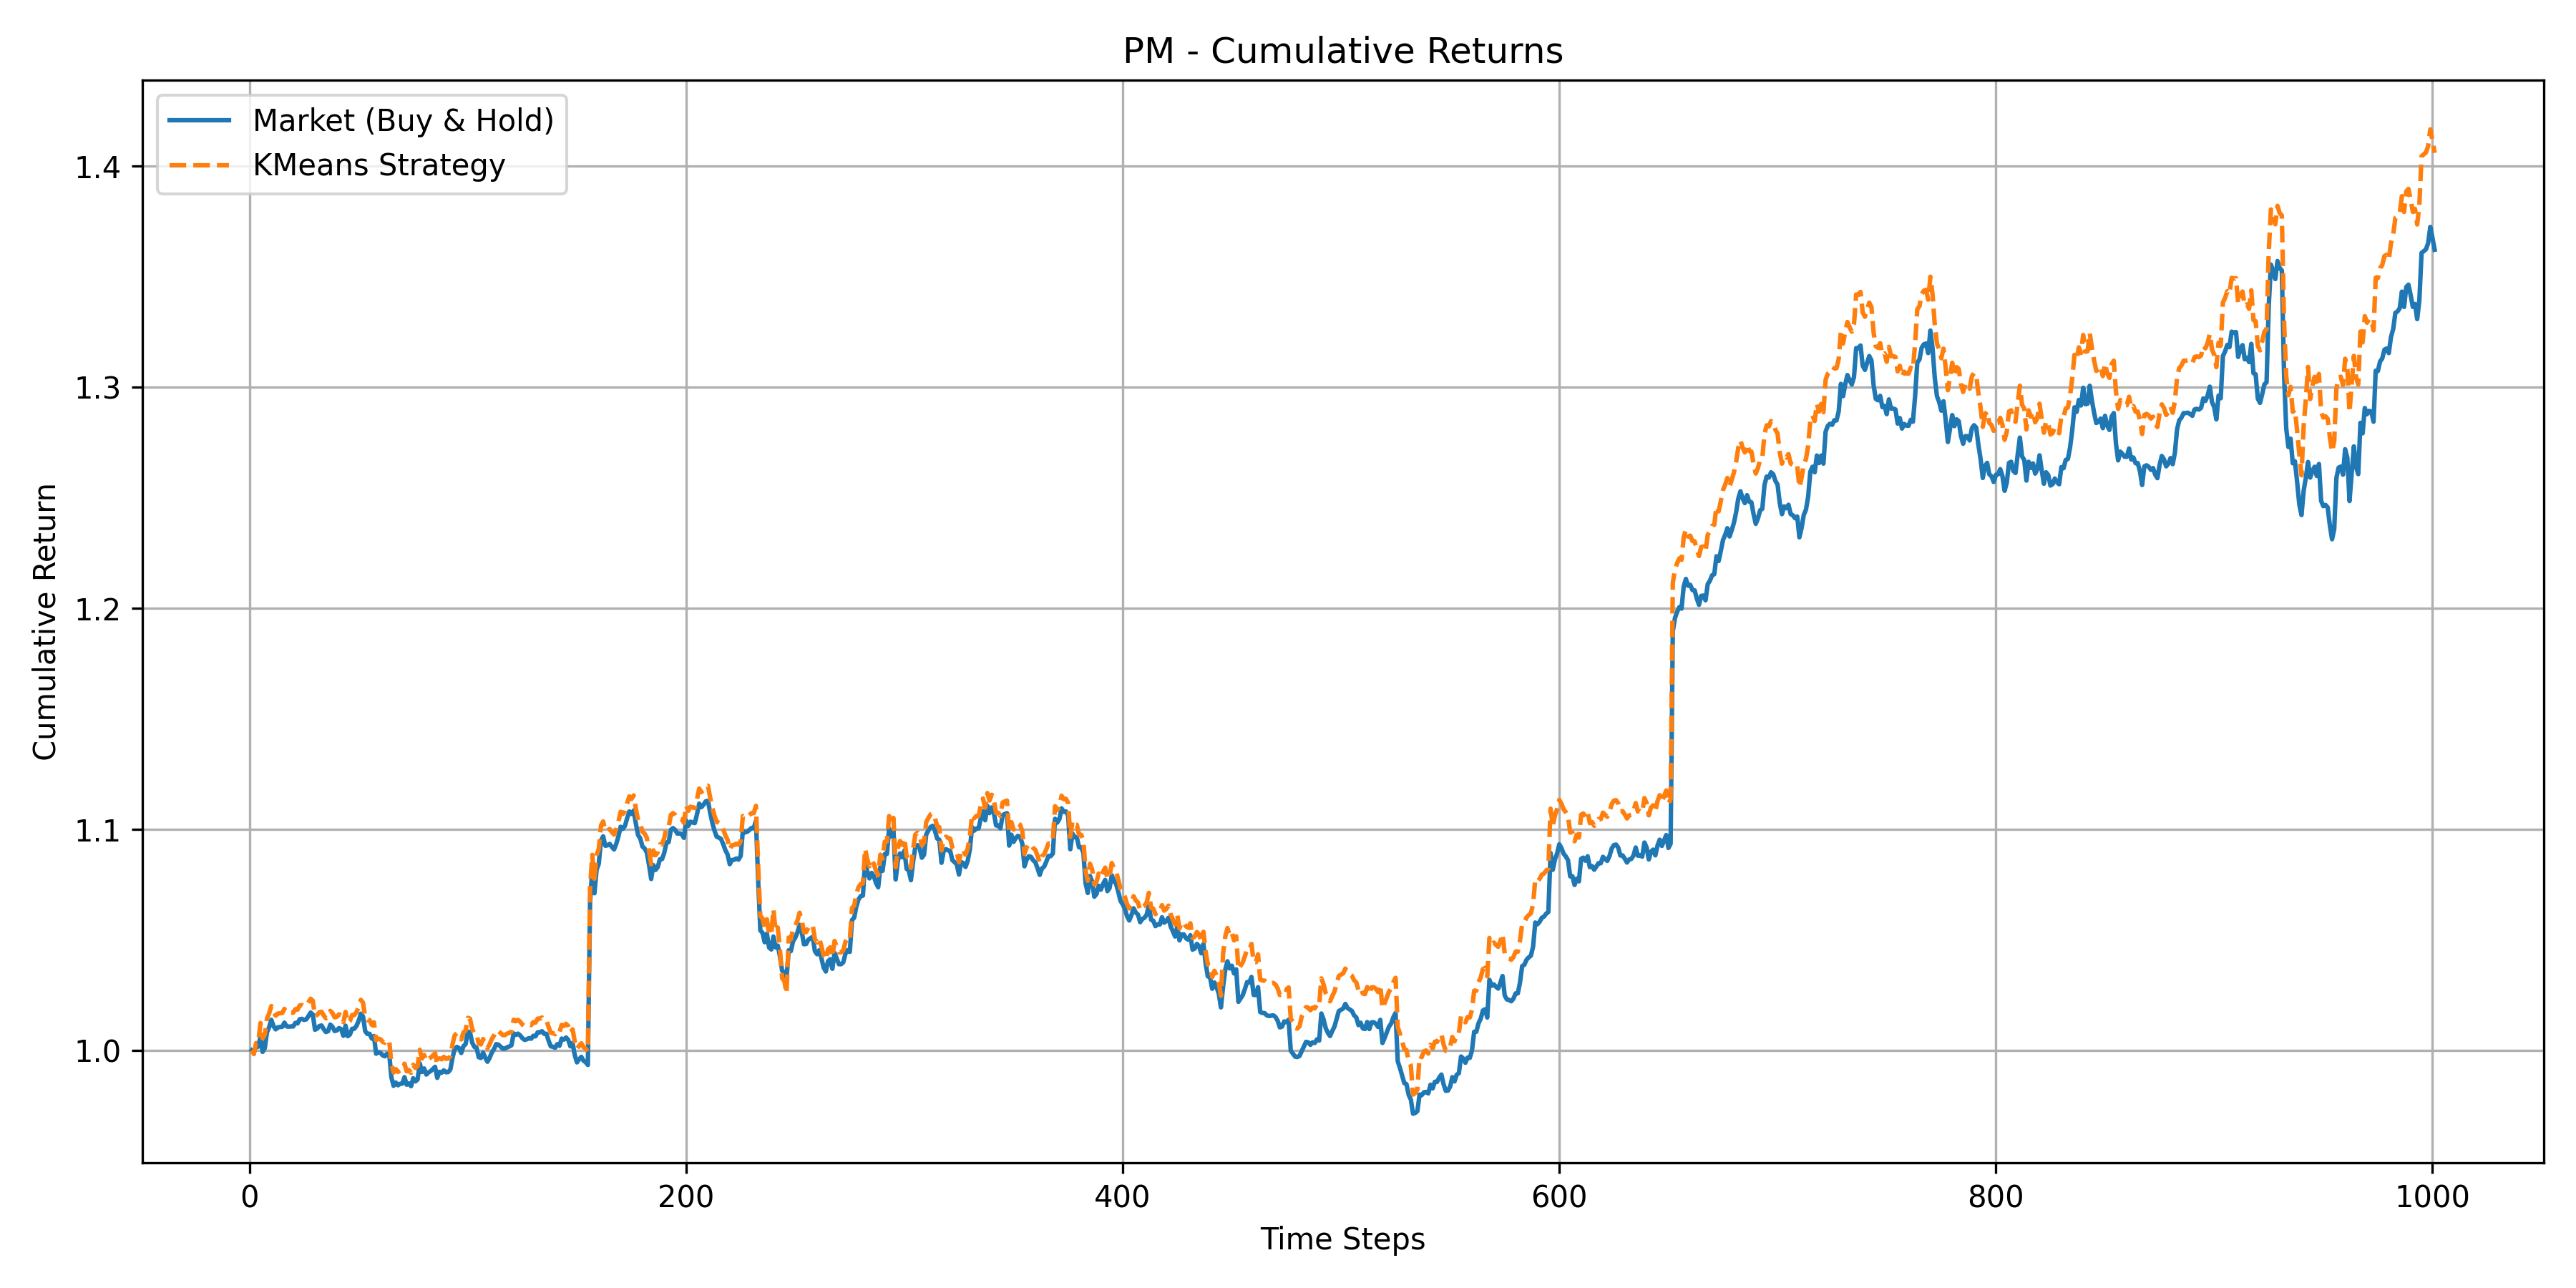

 WMT


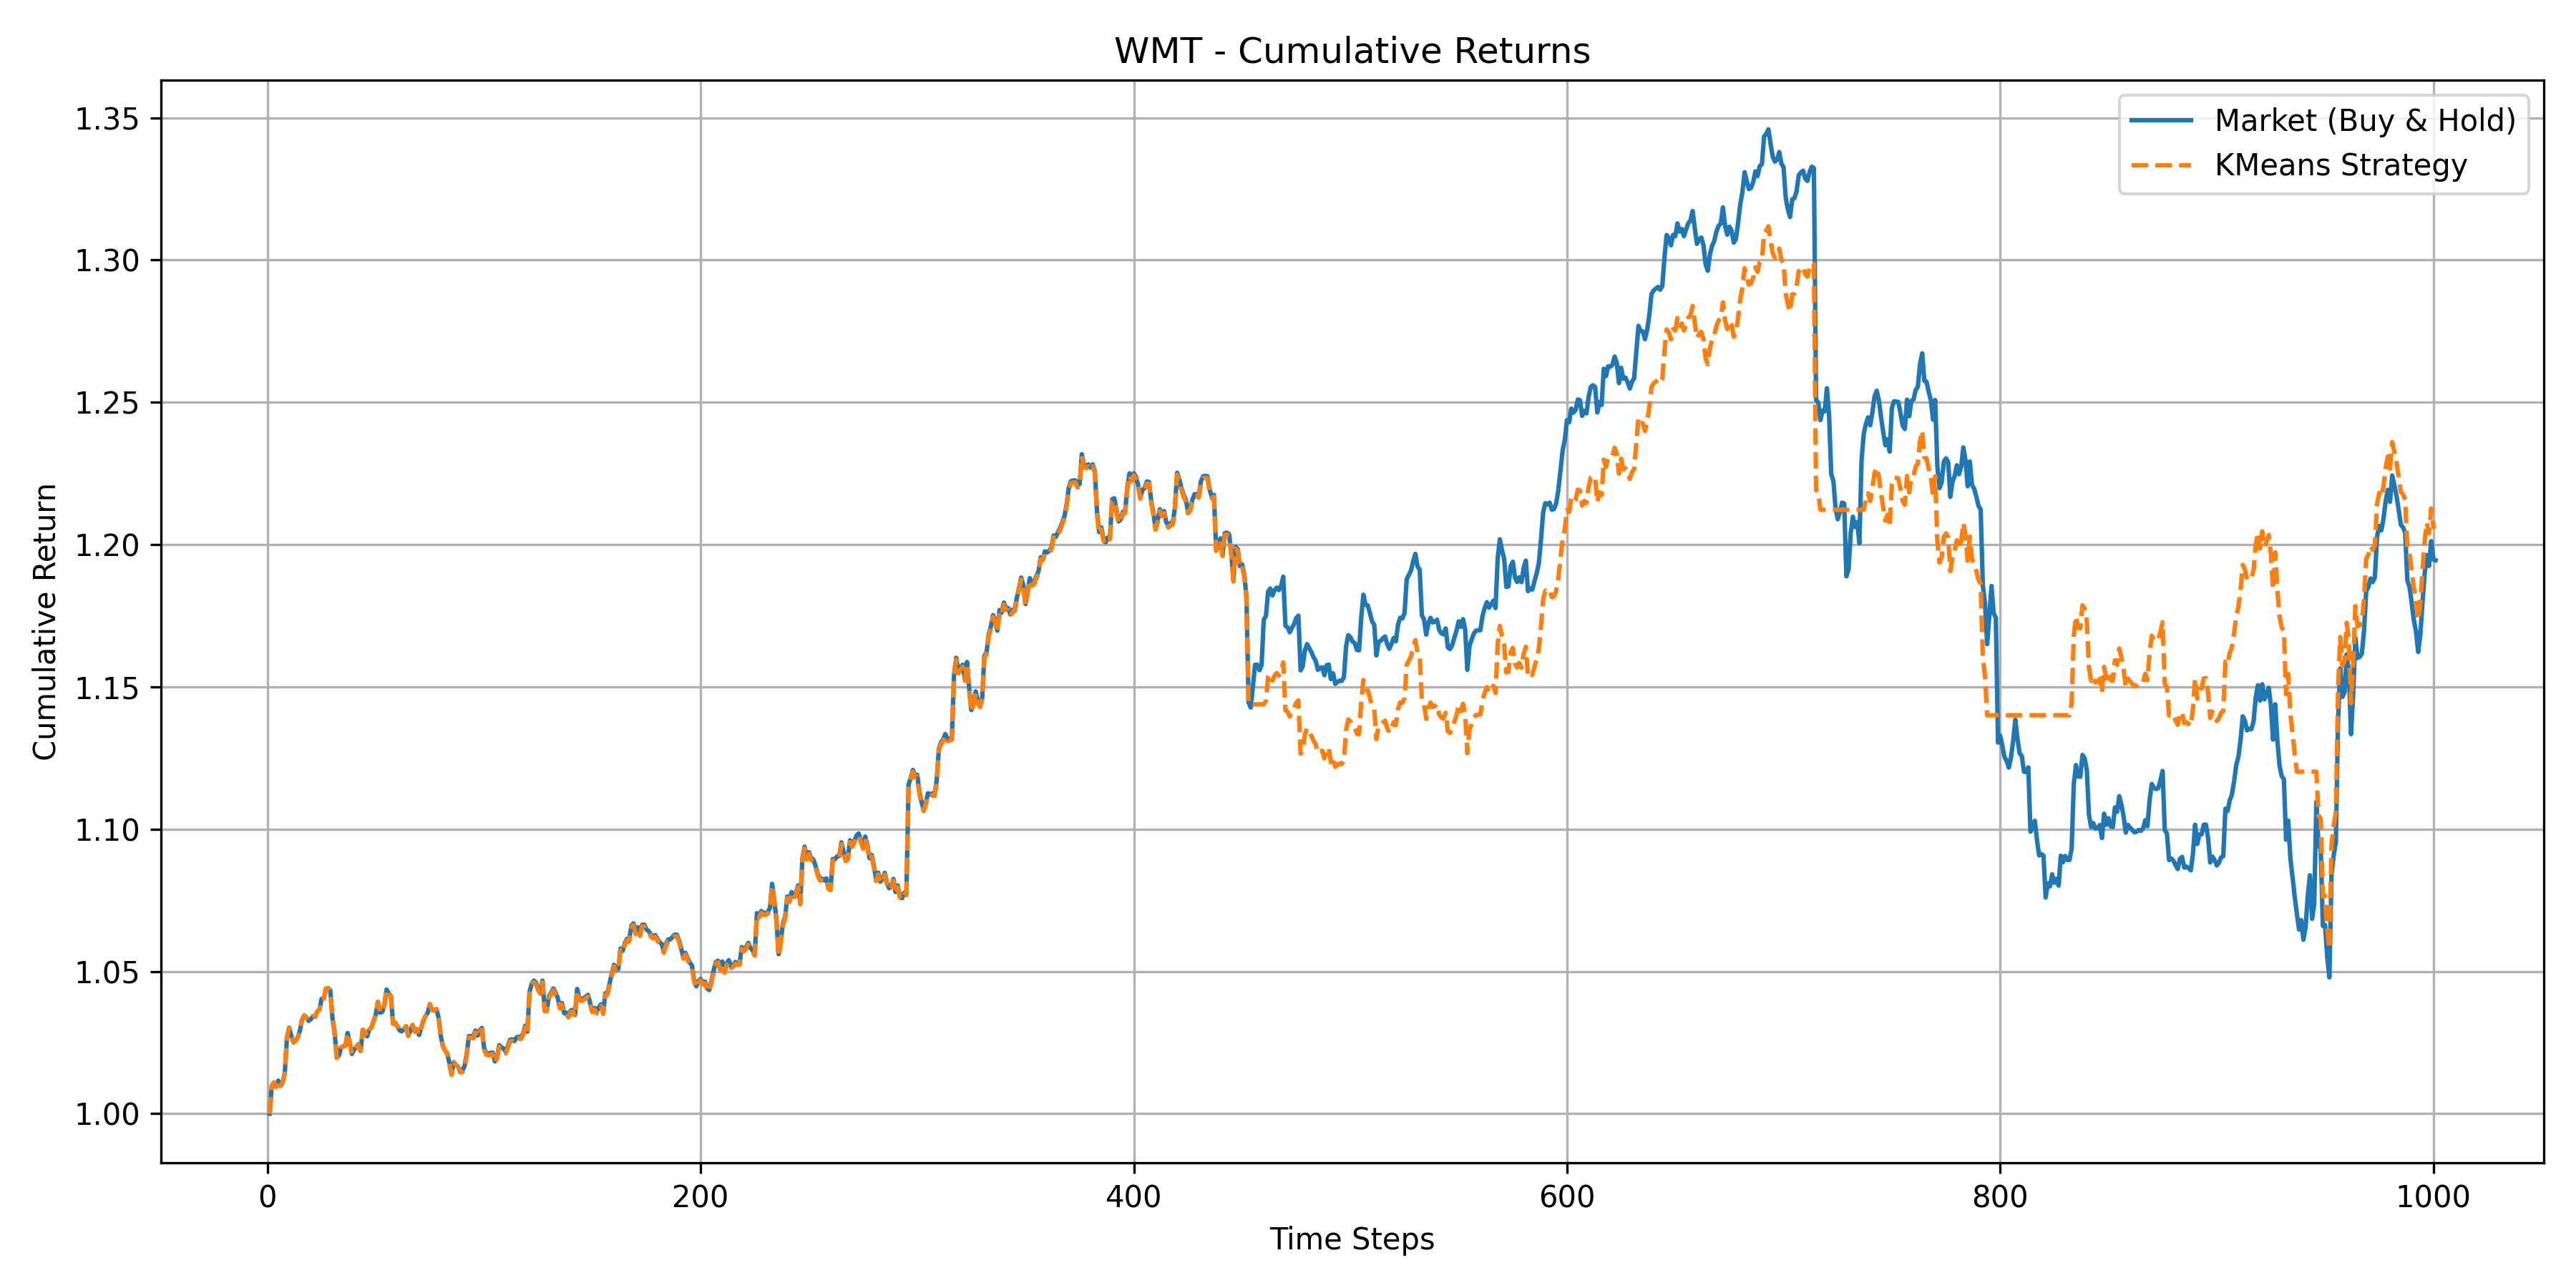

 COST


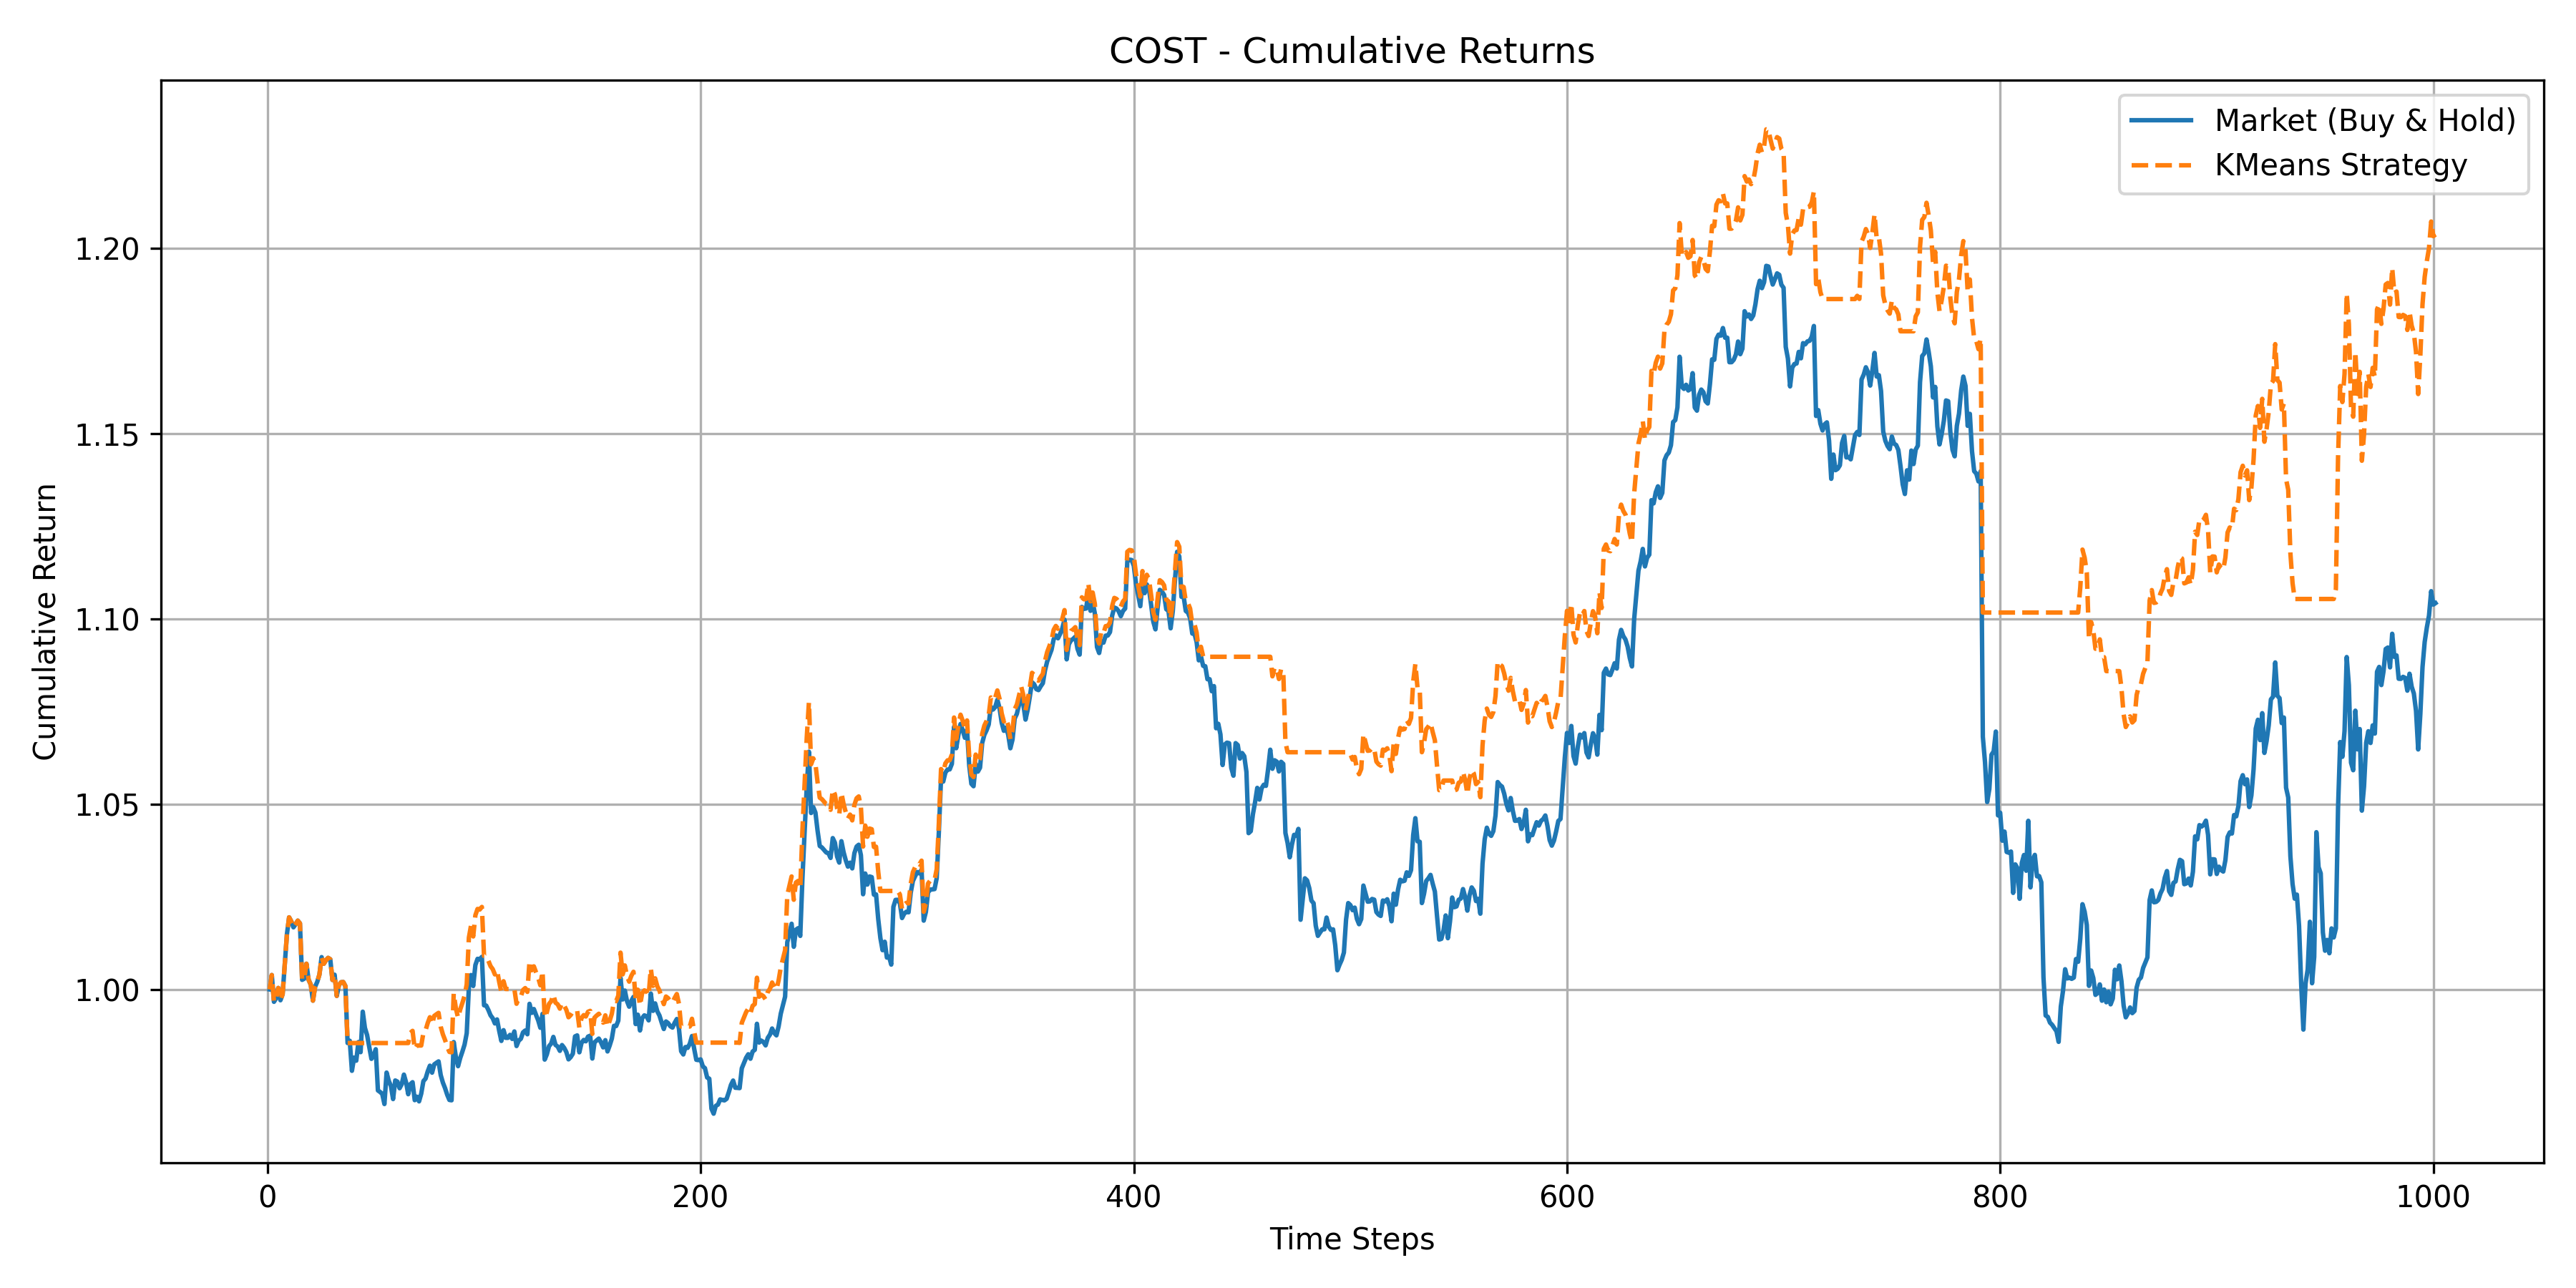

 AVGO


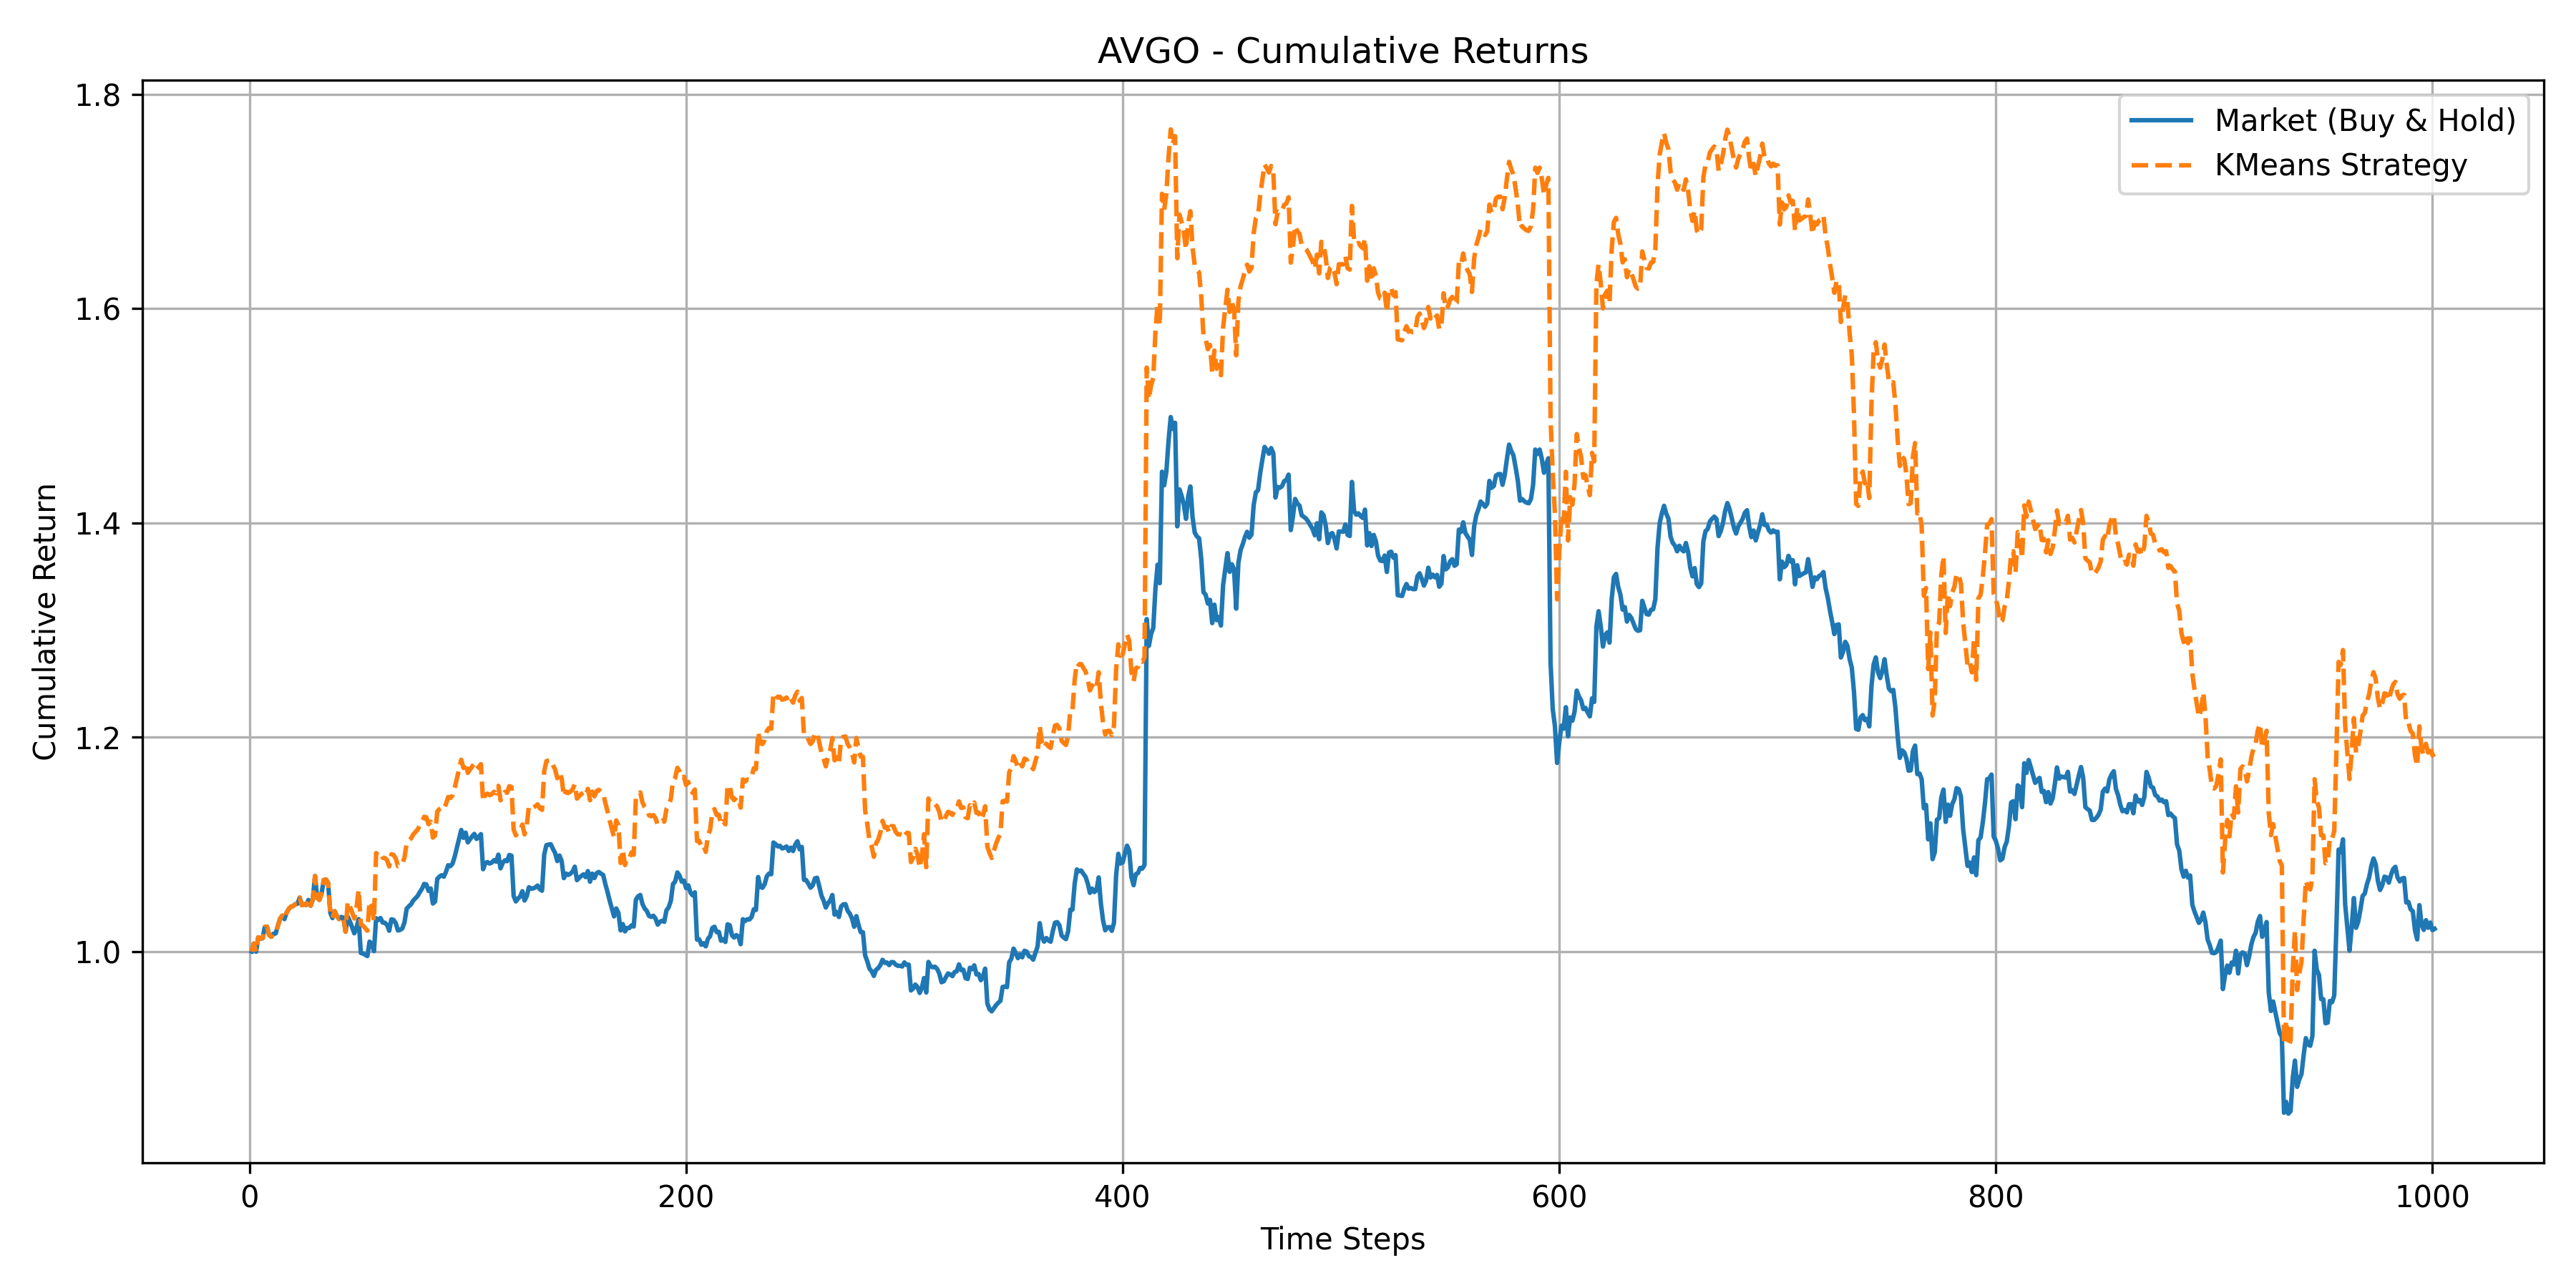

 BRK-B


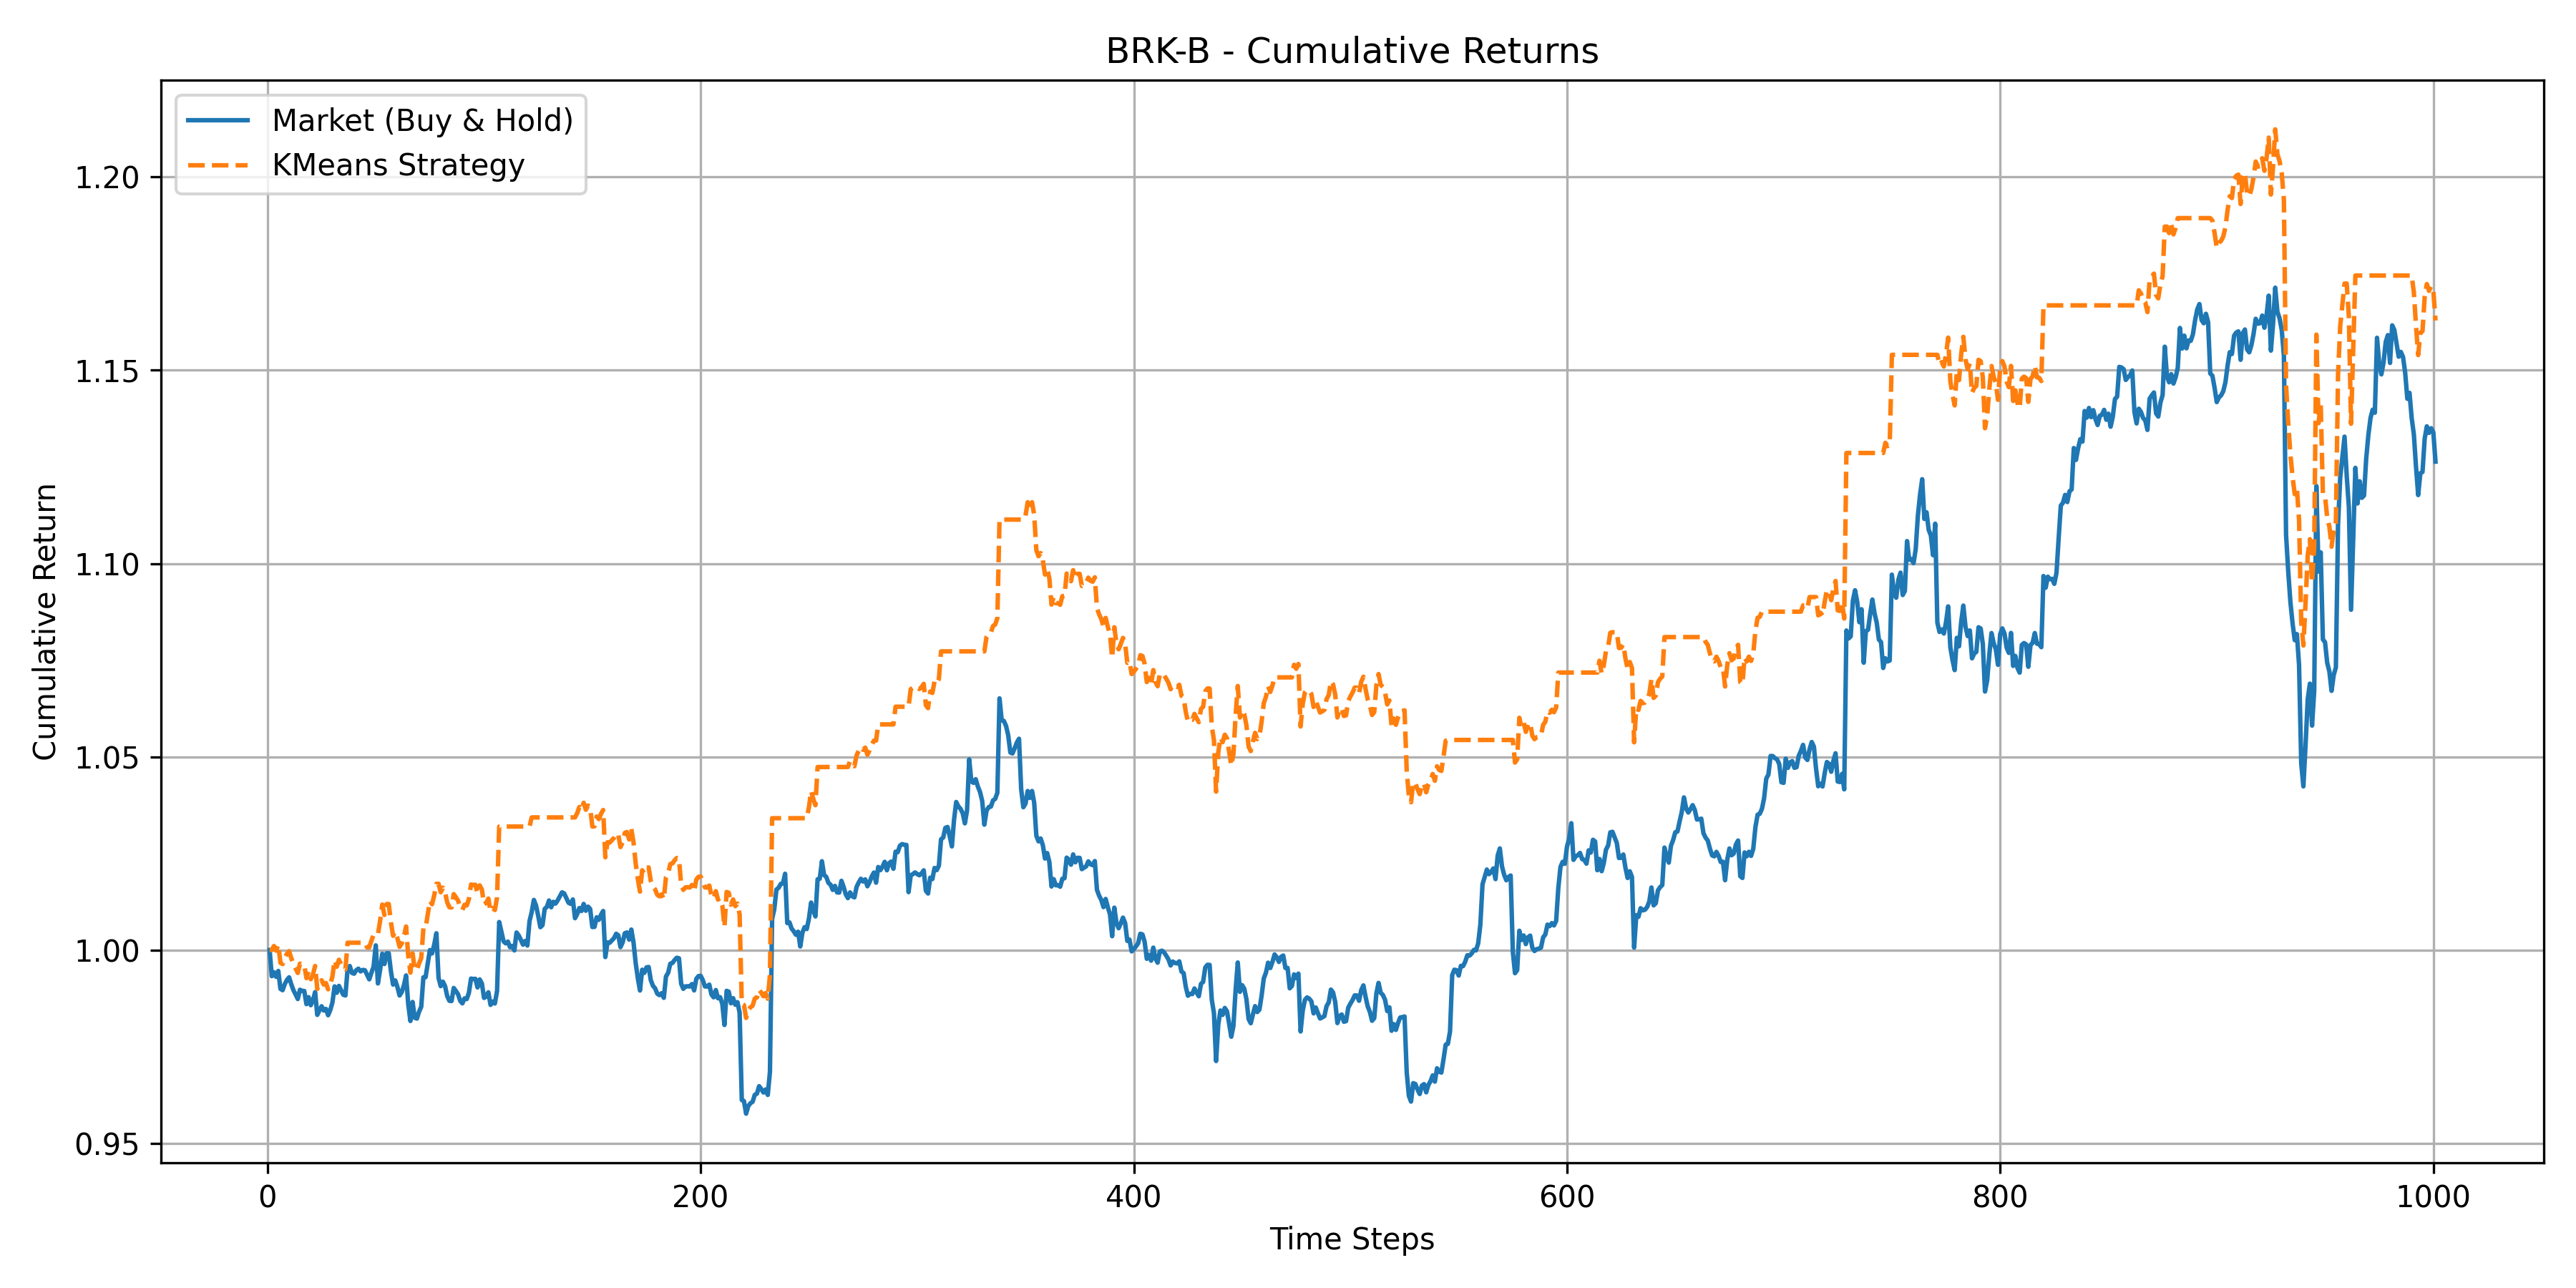

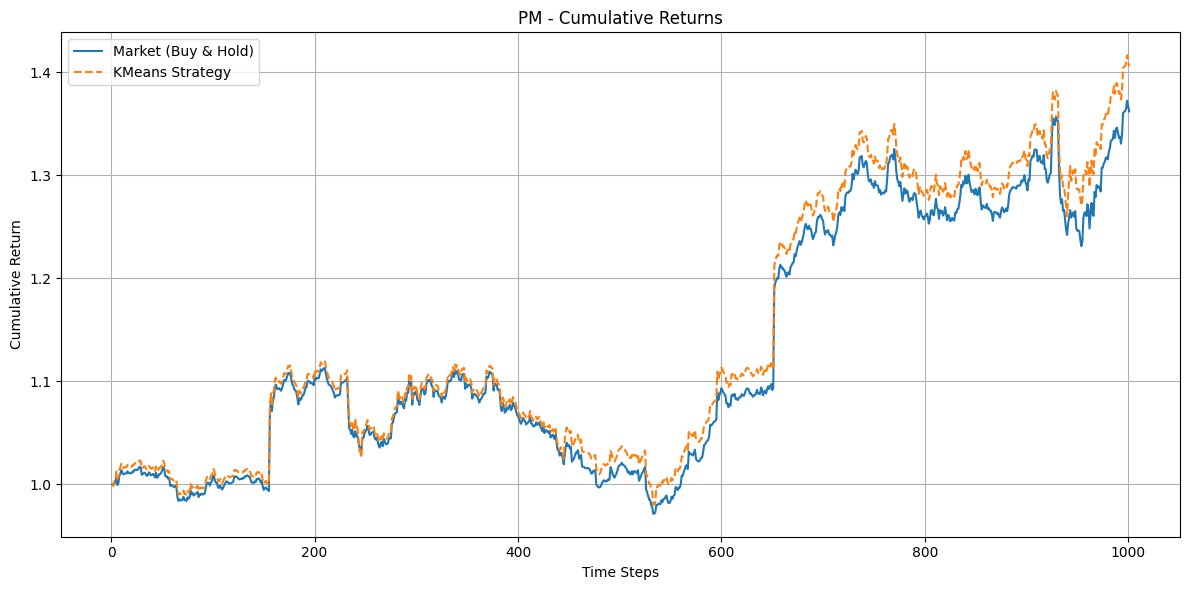

Plot saved for PM: results/kmeans_walkforward/plots/PM_portfolio_plot.png


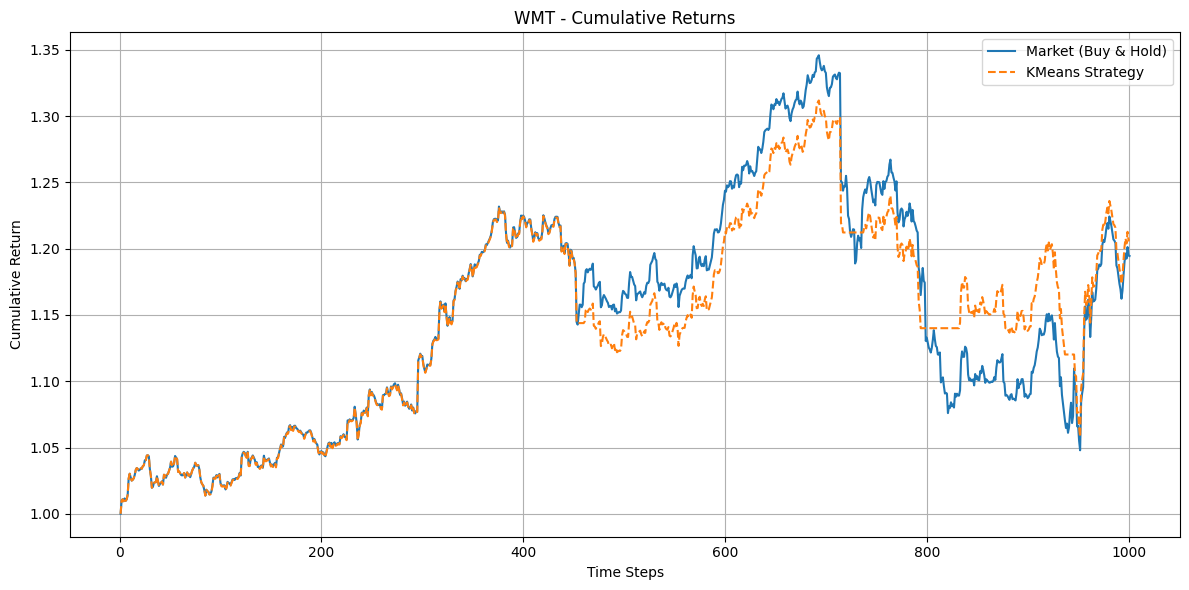

Plot saved for WMT: results/kmeans_walkforward/plots/WMT_portfolio_plot.png


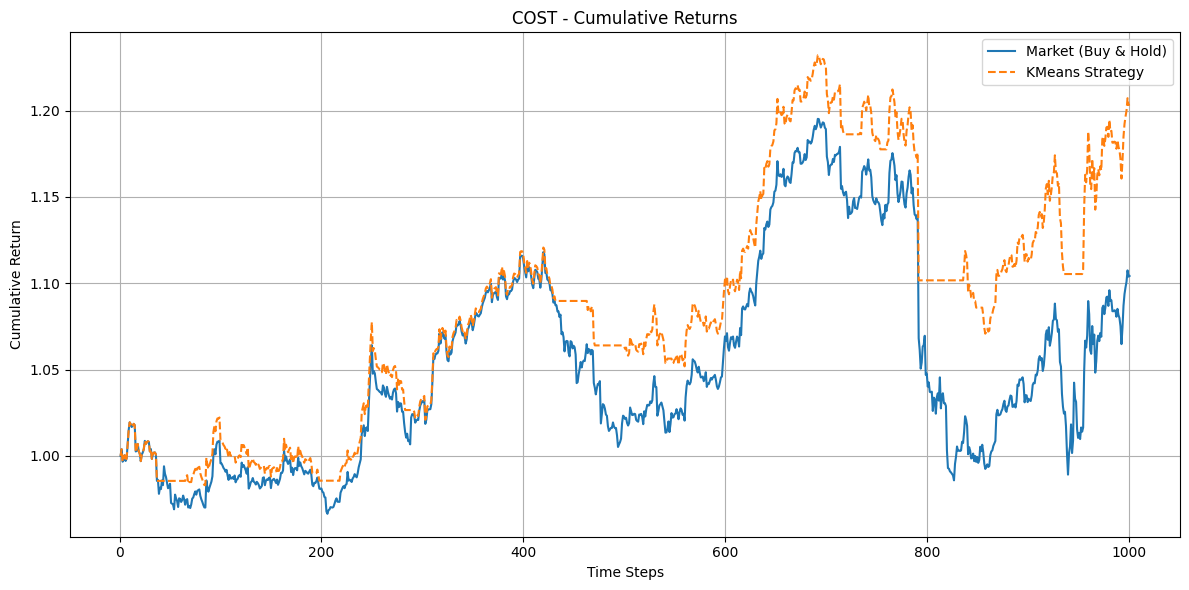

Plot saved for COST: results/kmeans_walkforward/plots/COST_portfolio_plot.png


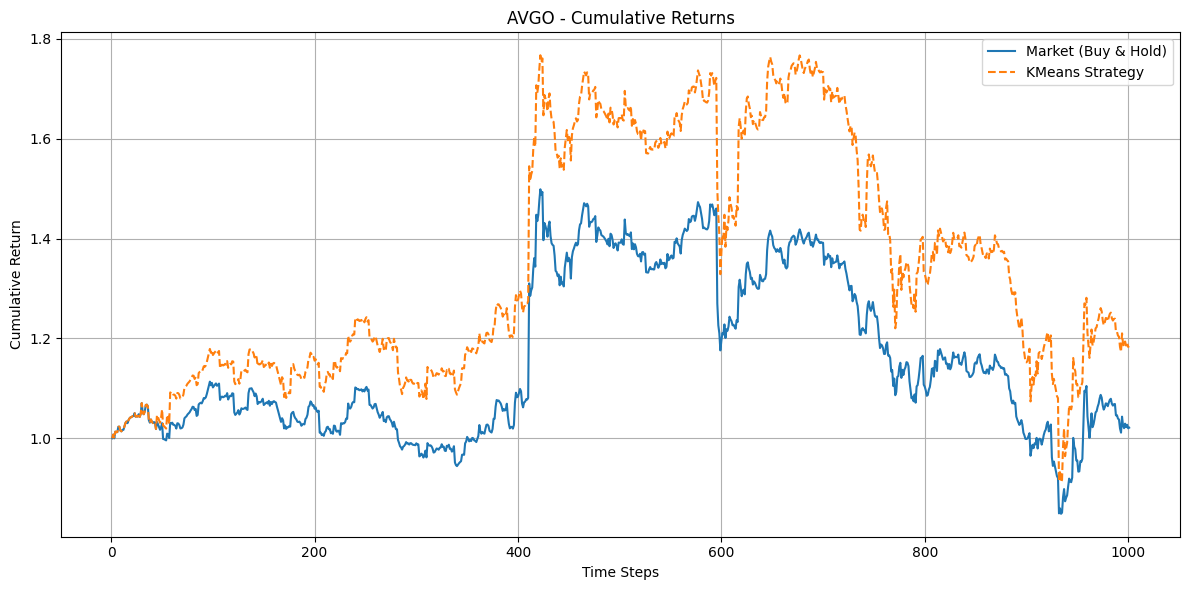

Plot saved for AVGO: results/kmeans_walkforward/plots/AVGO_portfolio_plot.png


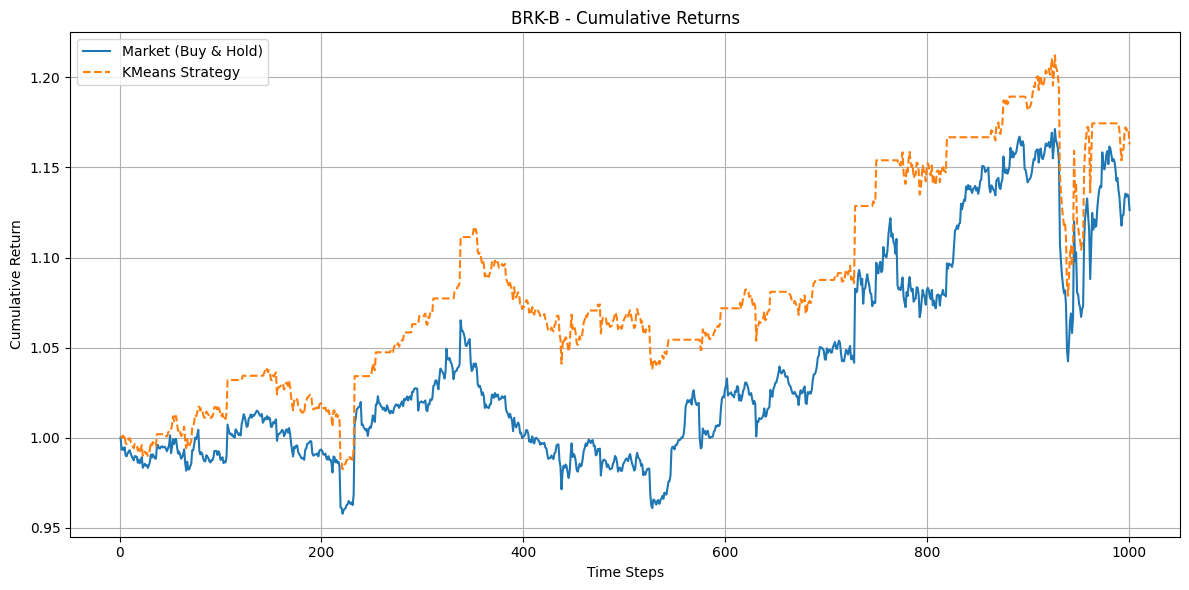

Plot saved for BRK-B: results/kmeans_walkforward/plots/BRK-B_portfolio_plot.png
 PM


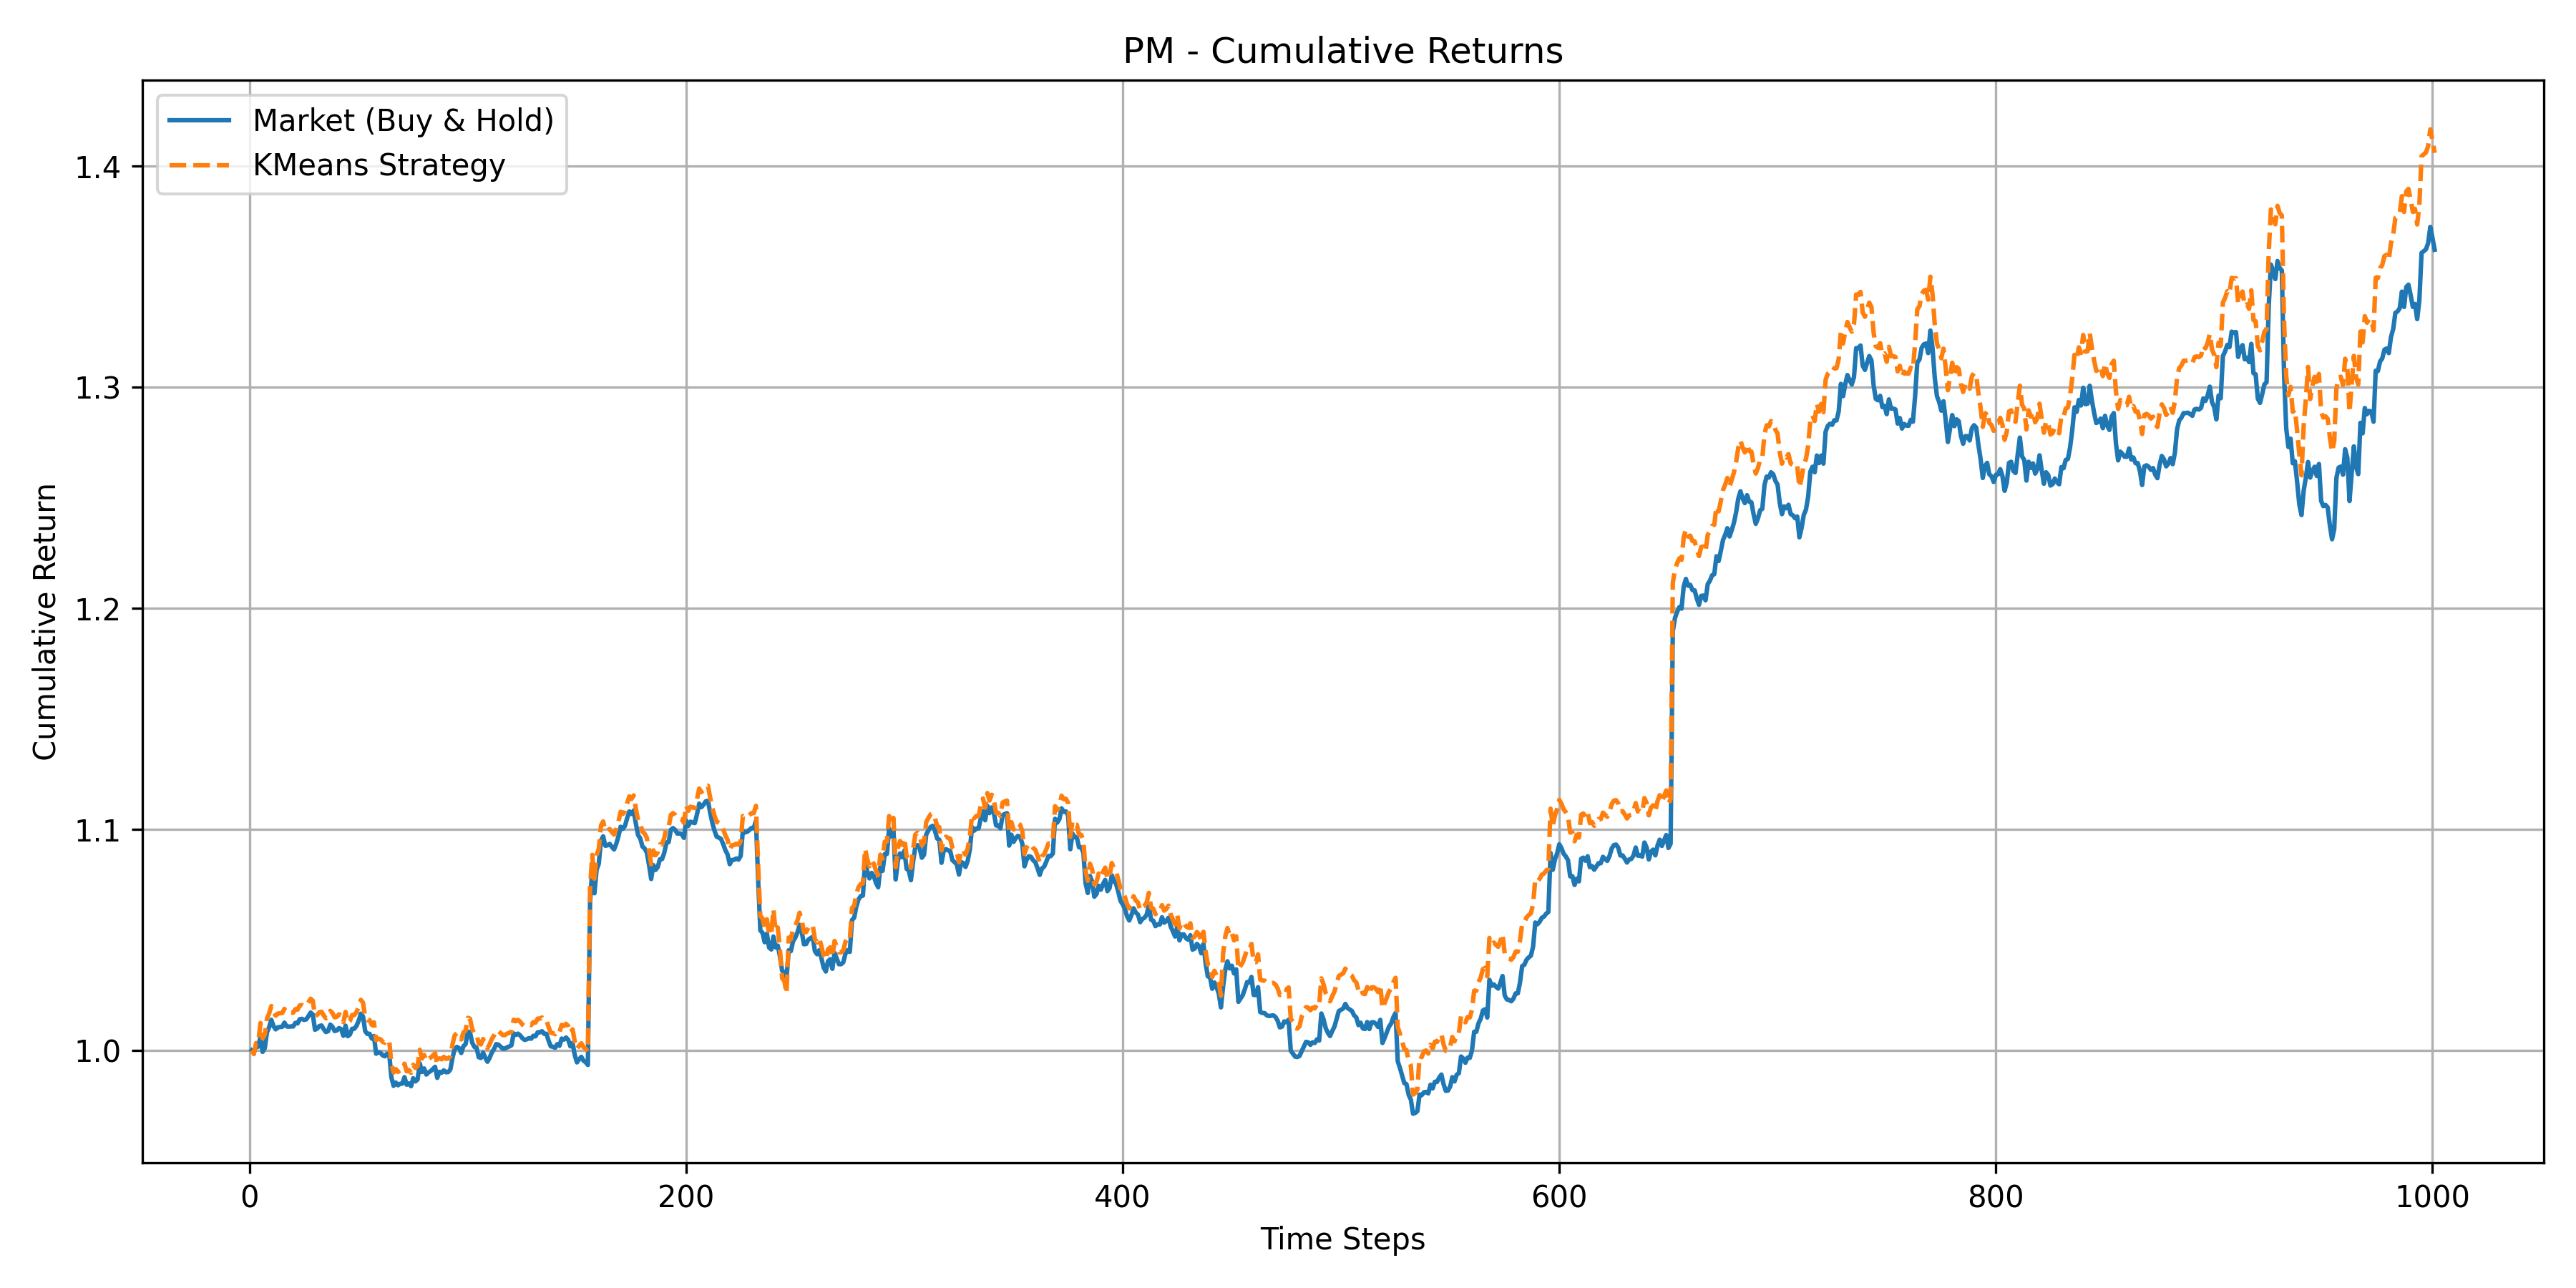

 WMT


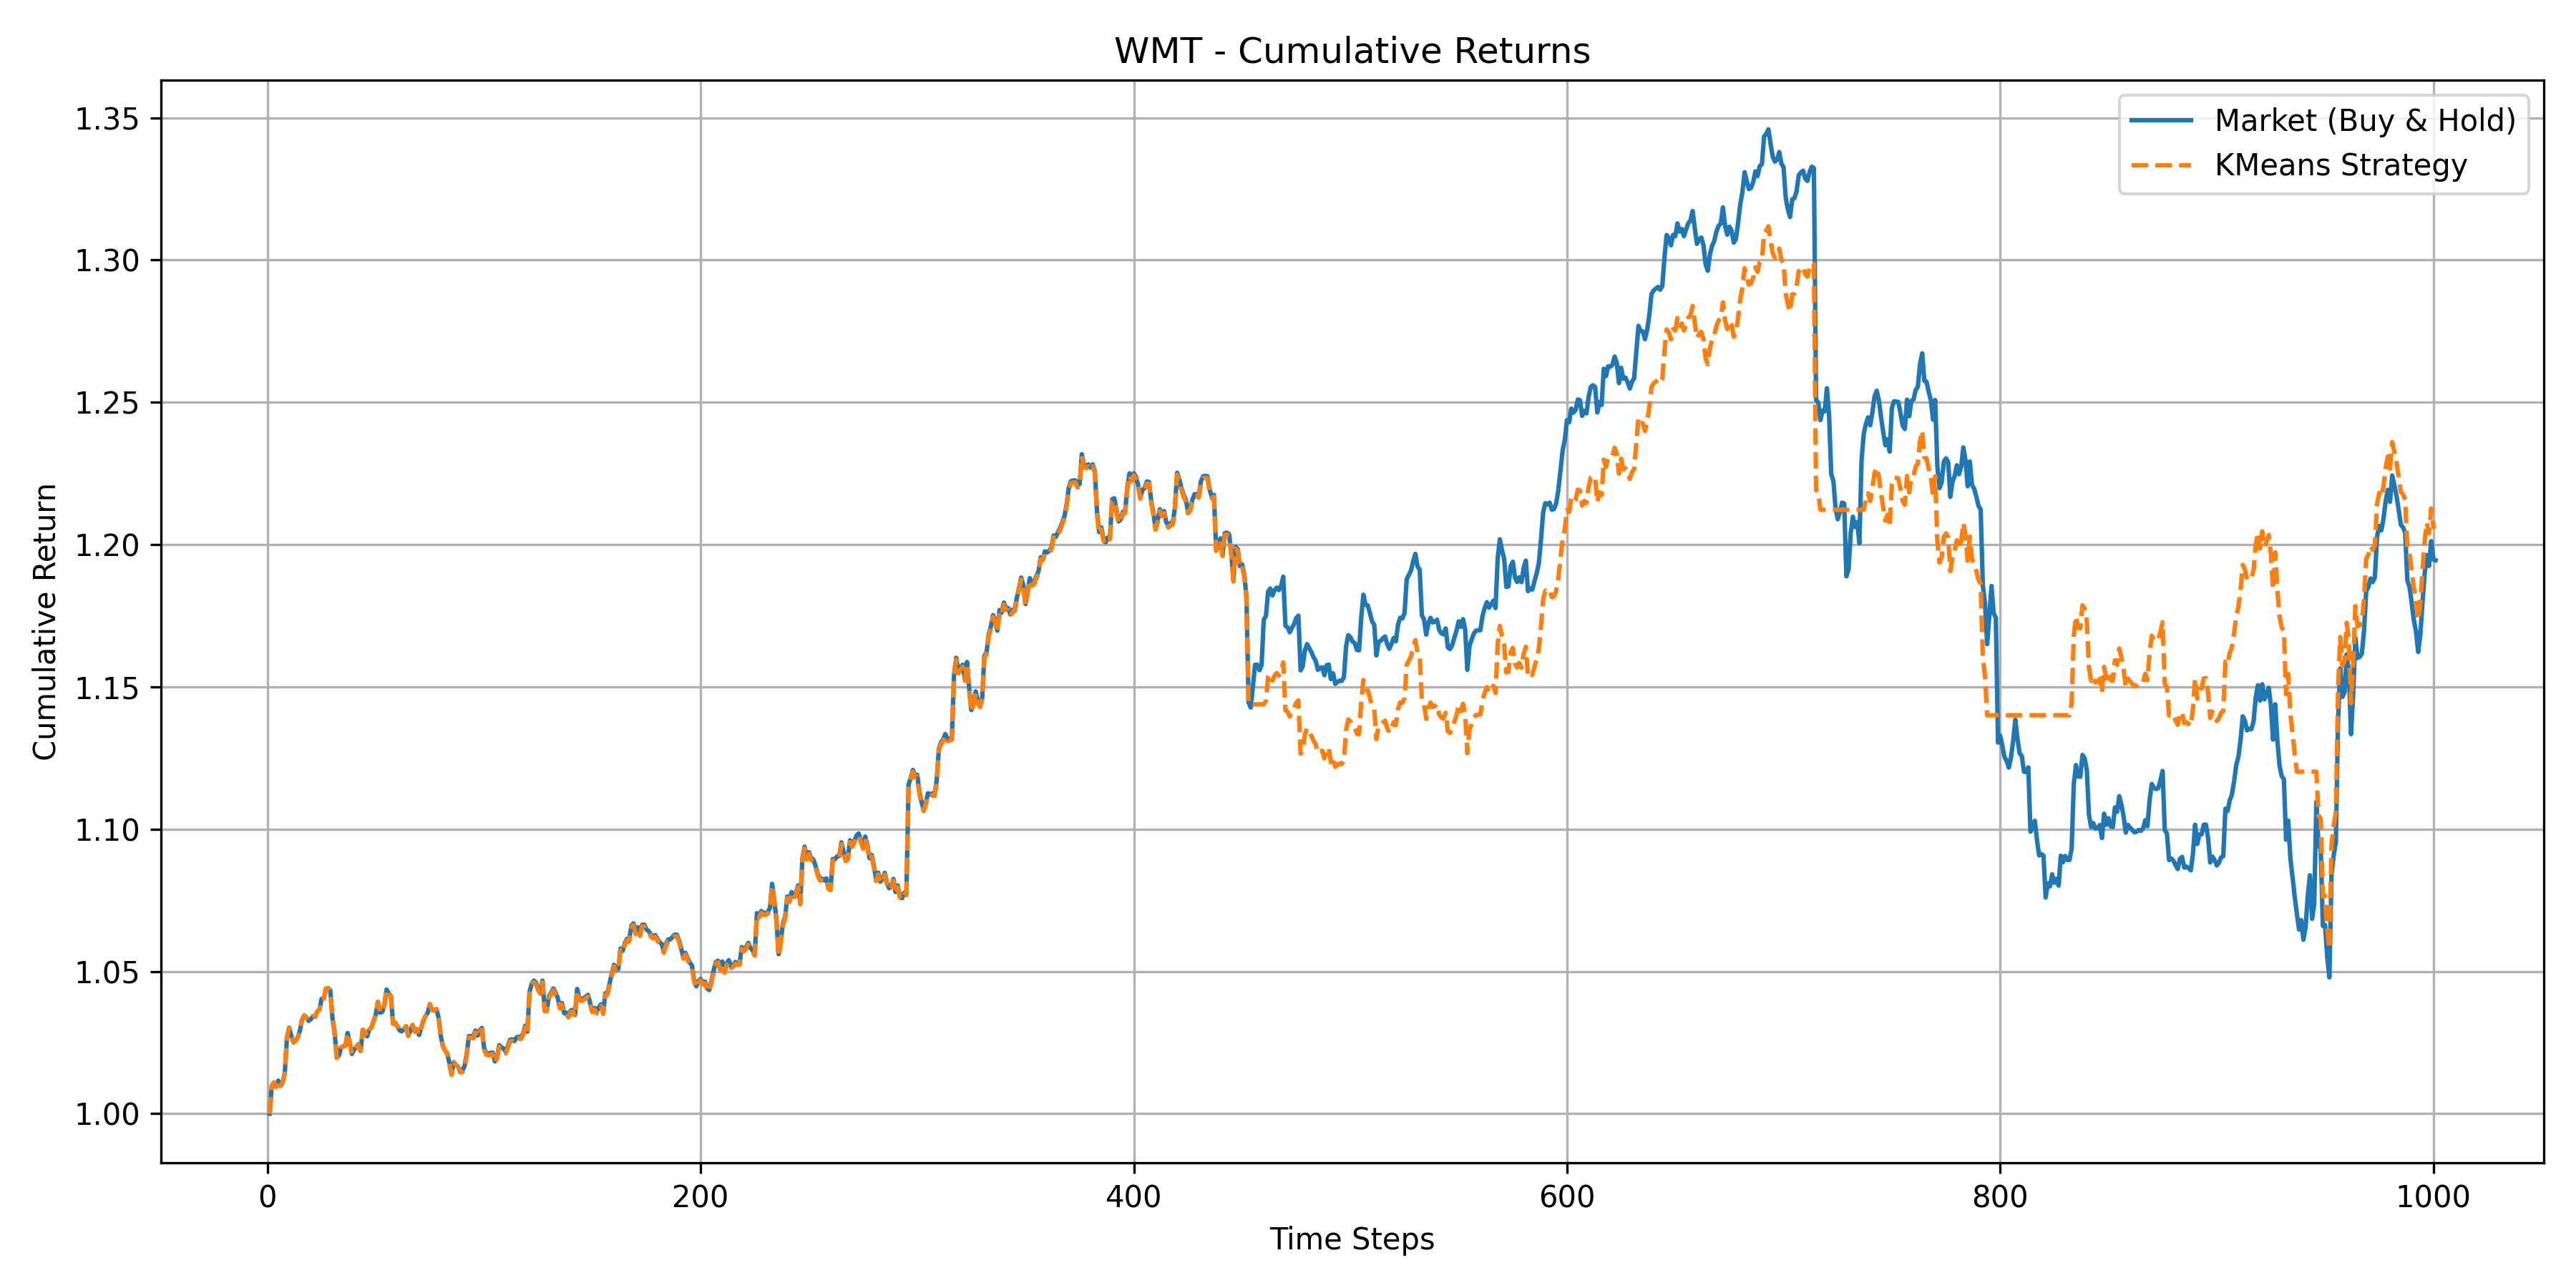

 COST


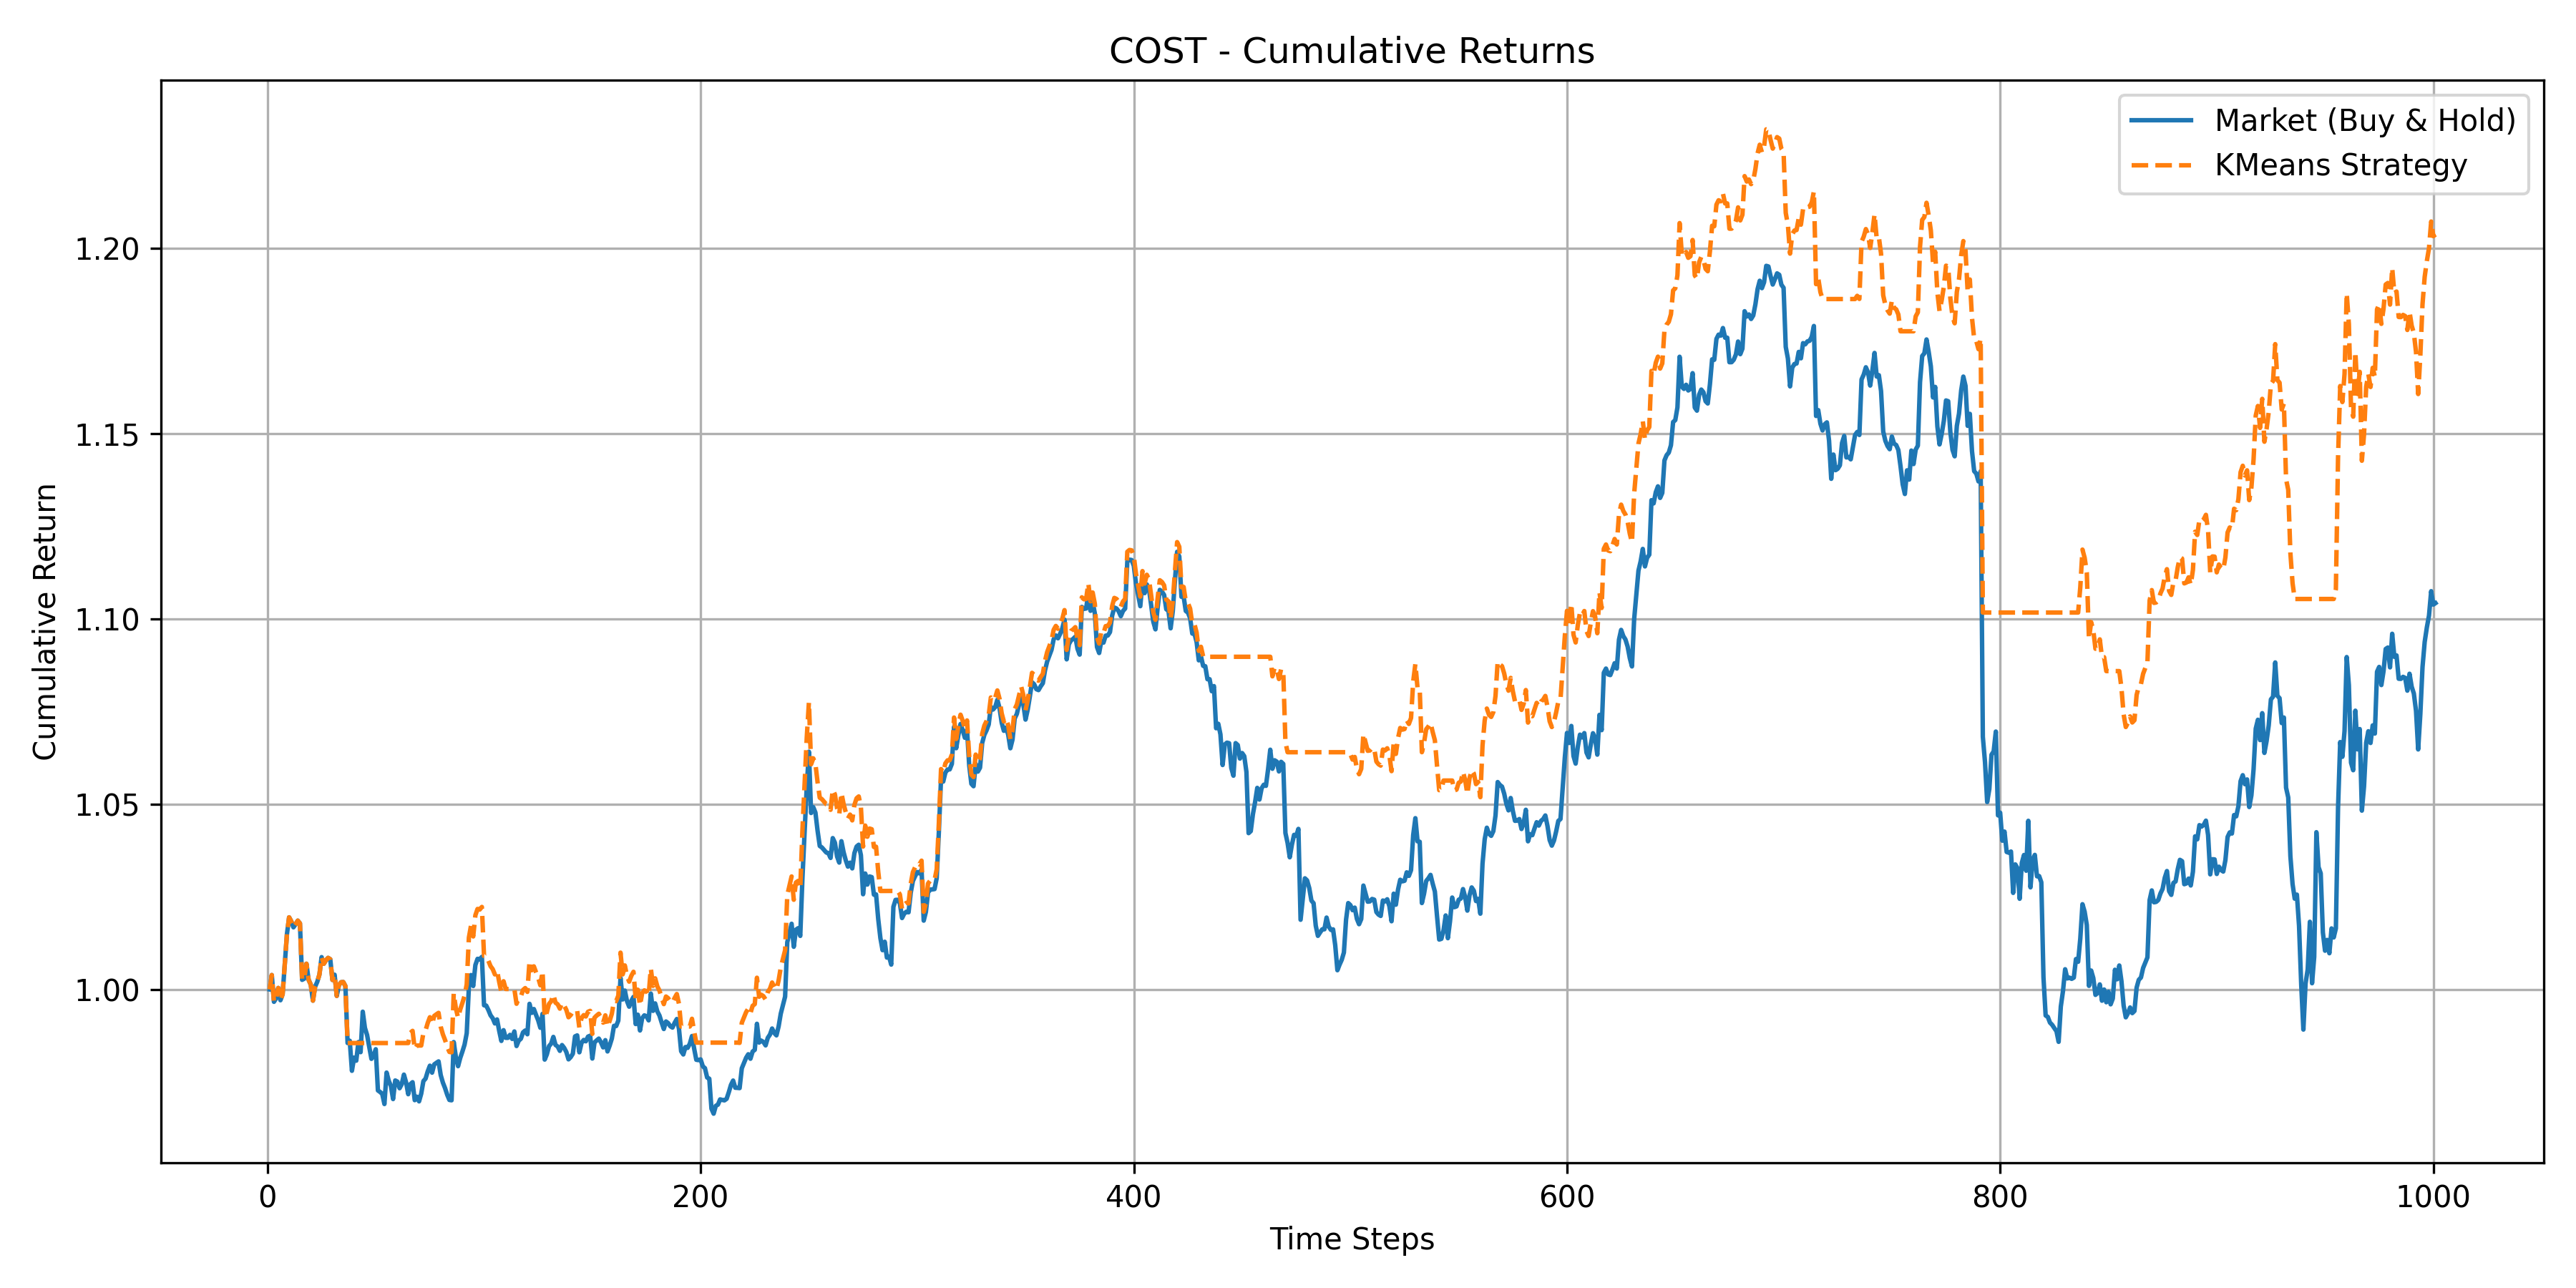

 AVGO


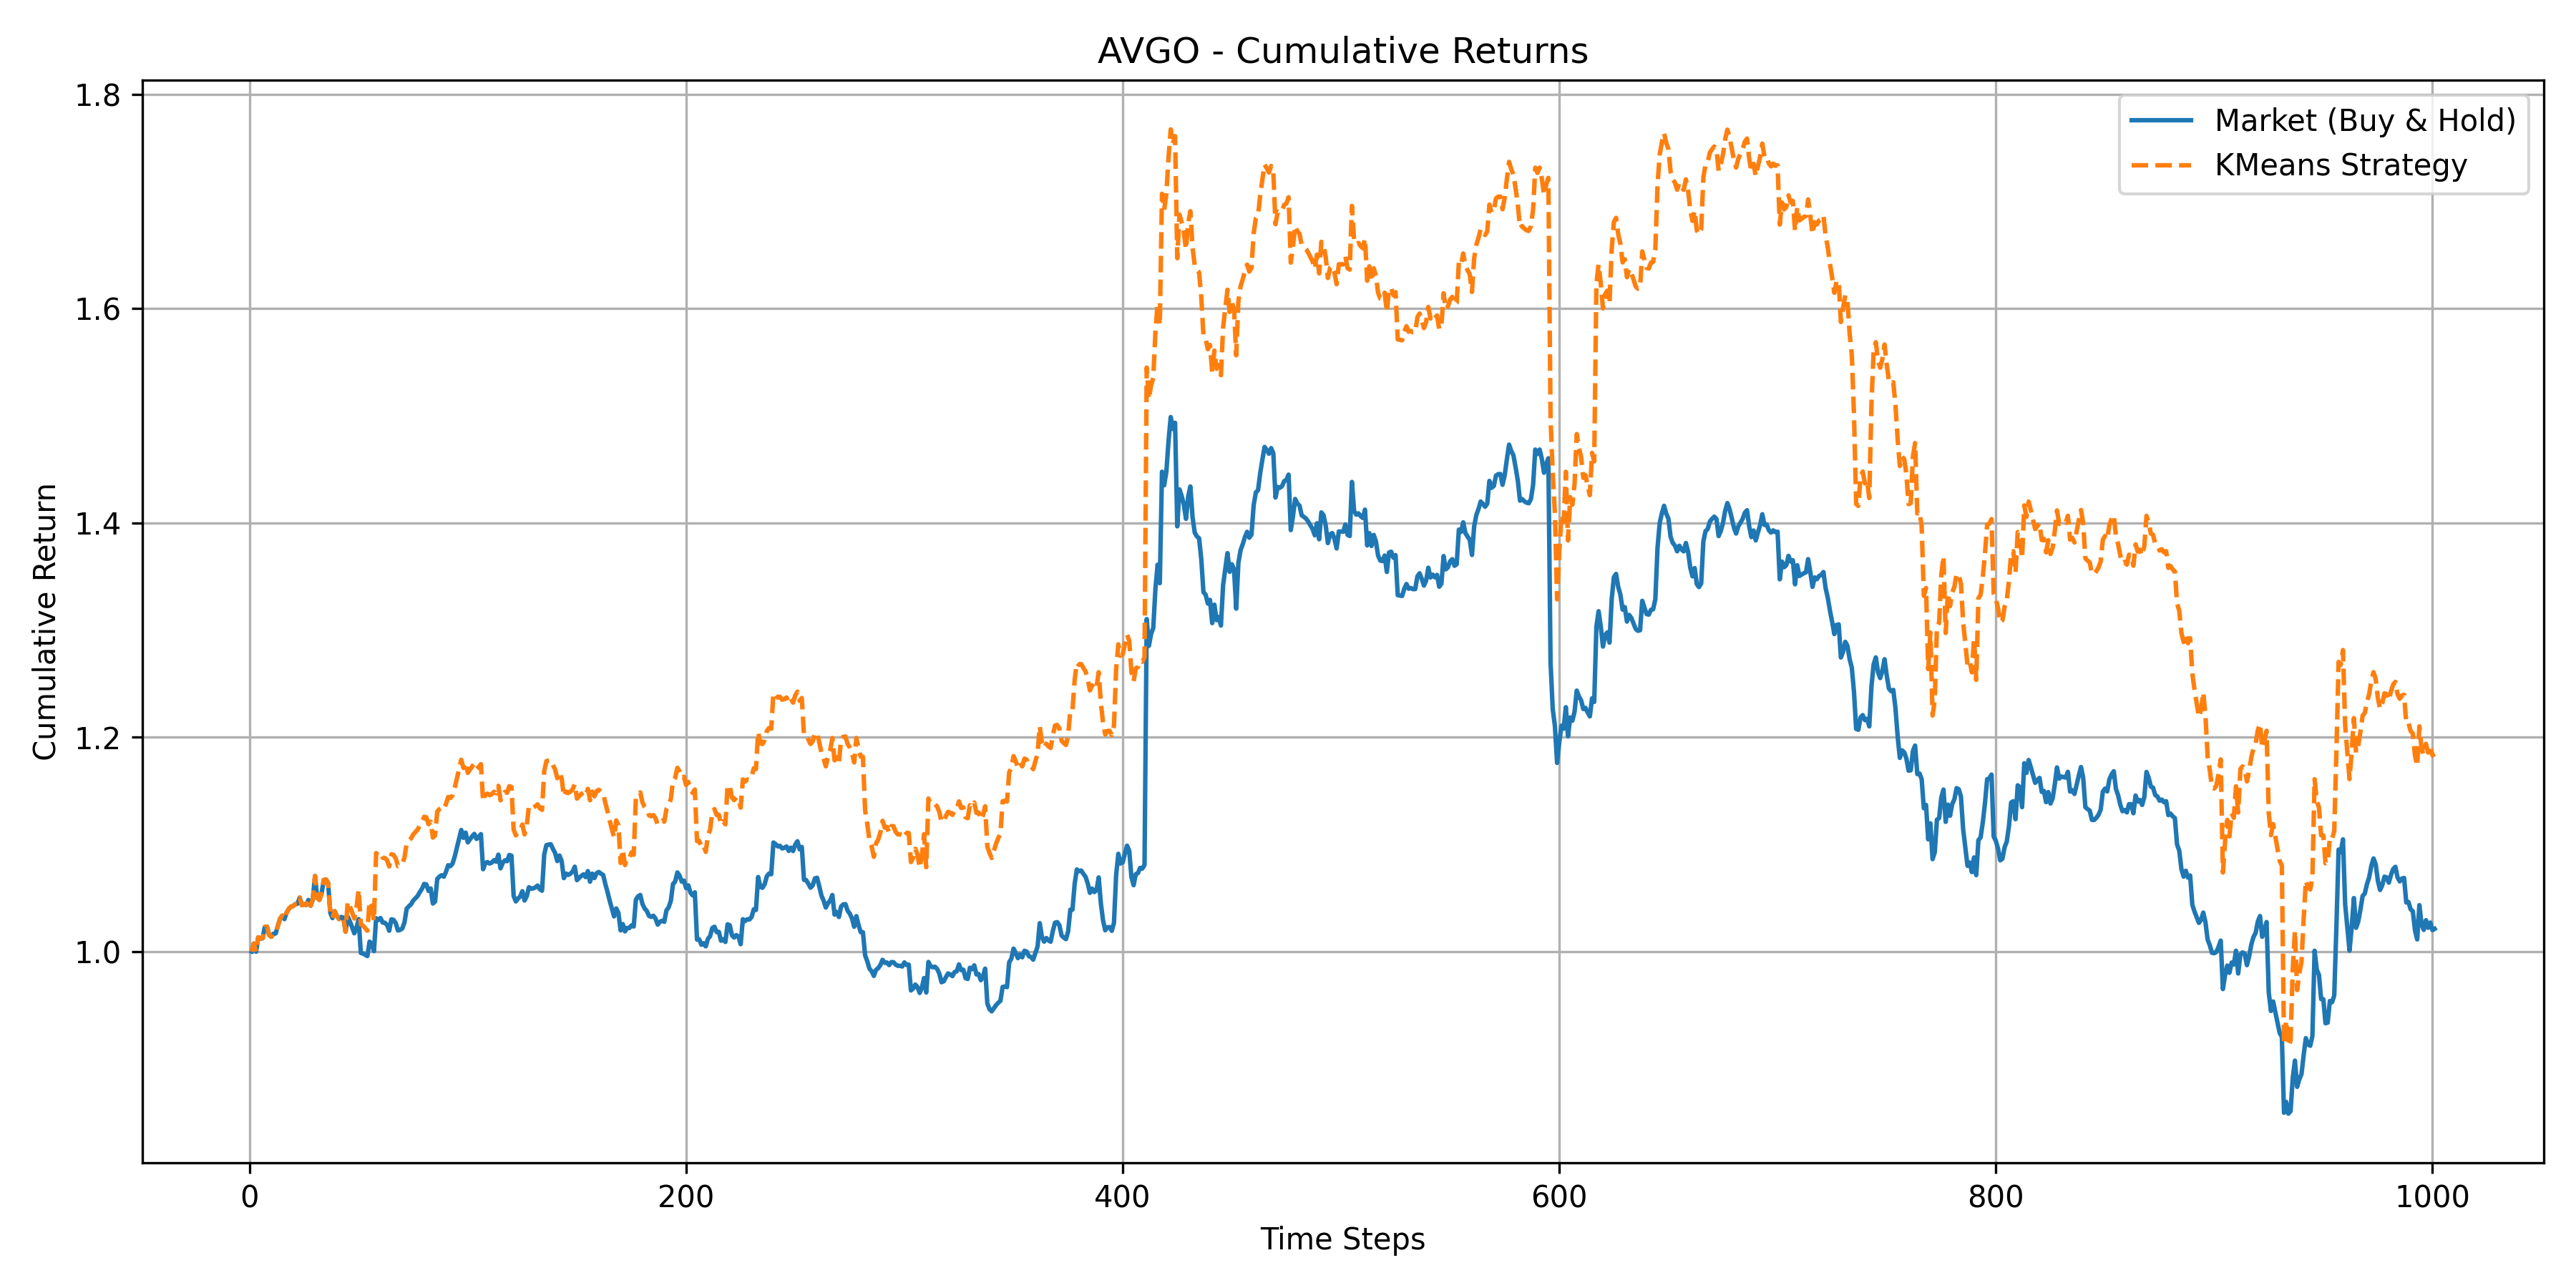

 BRK-B


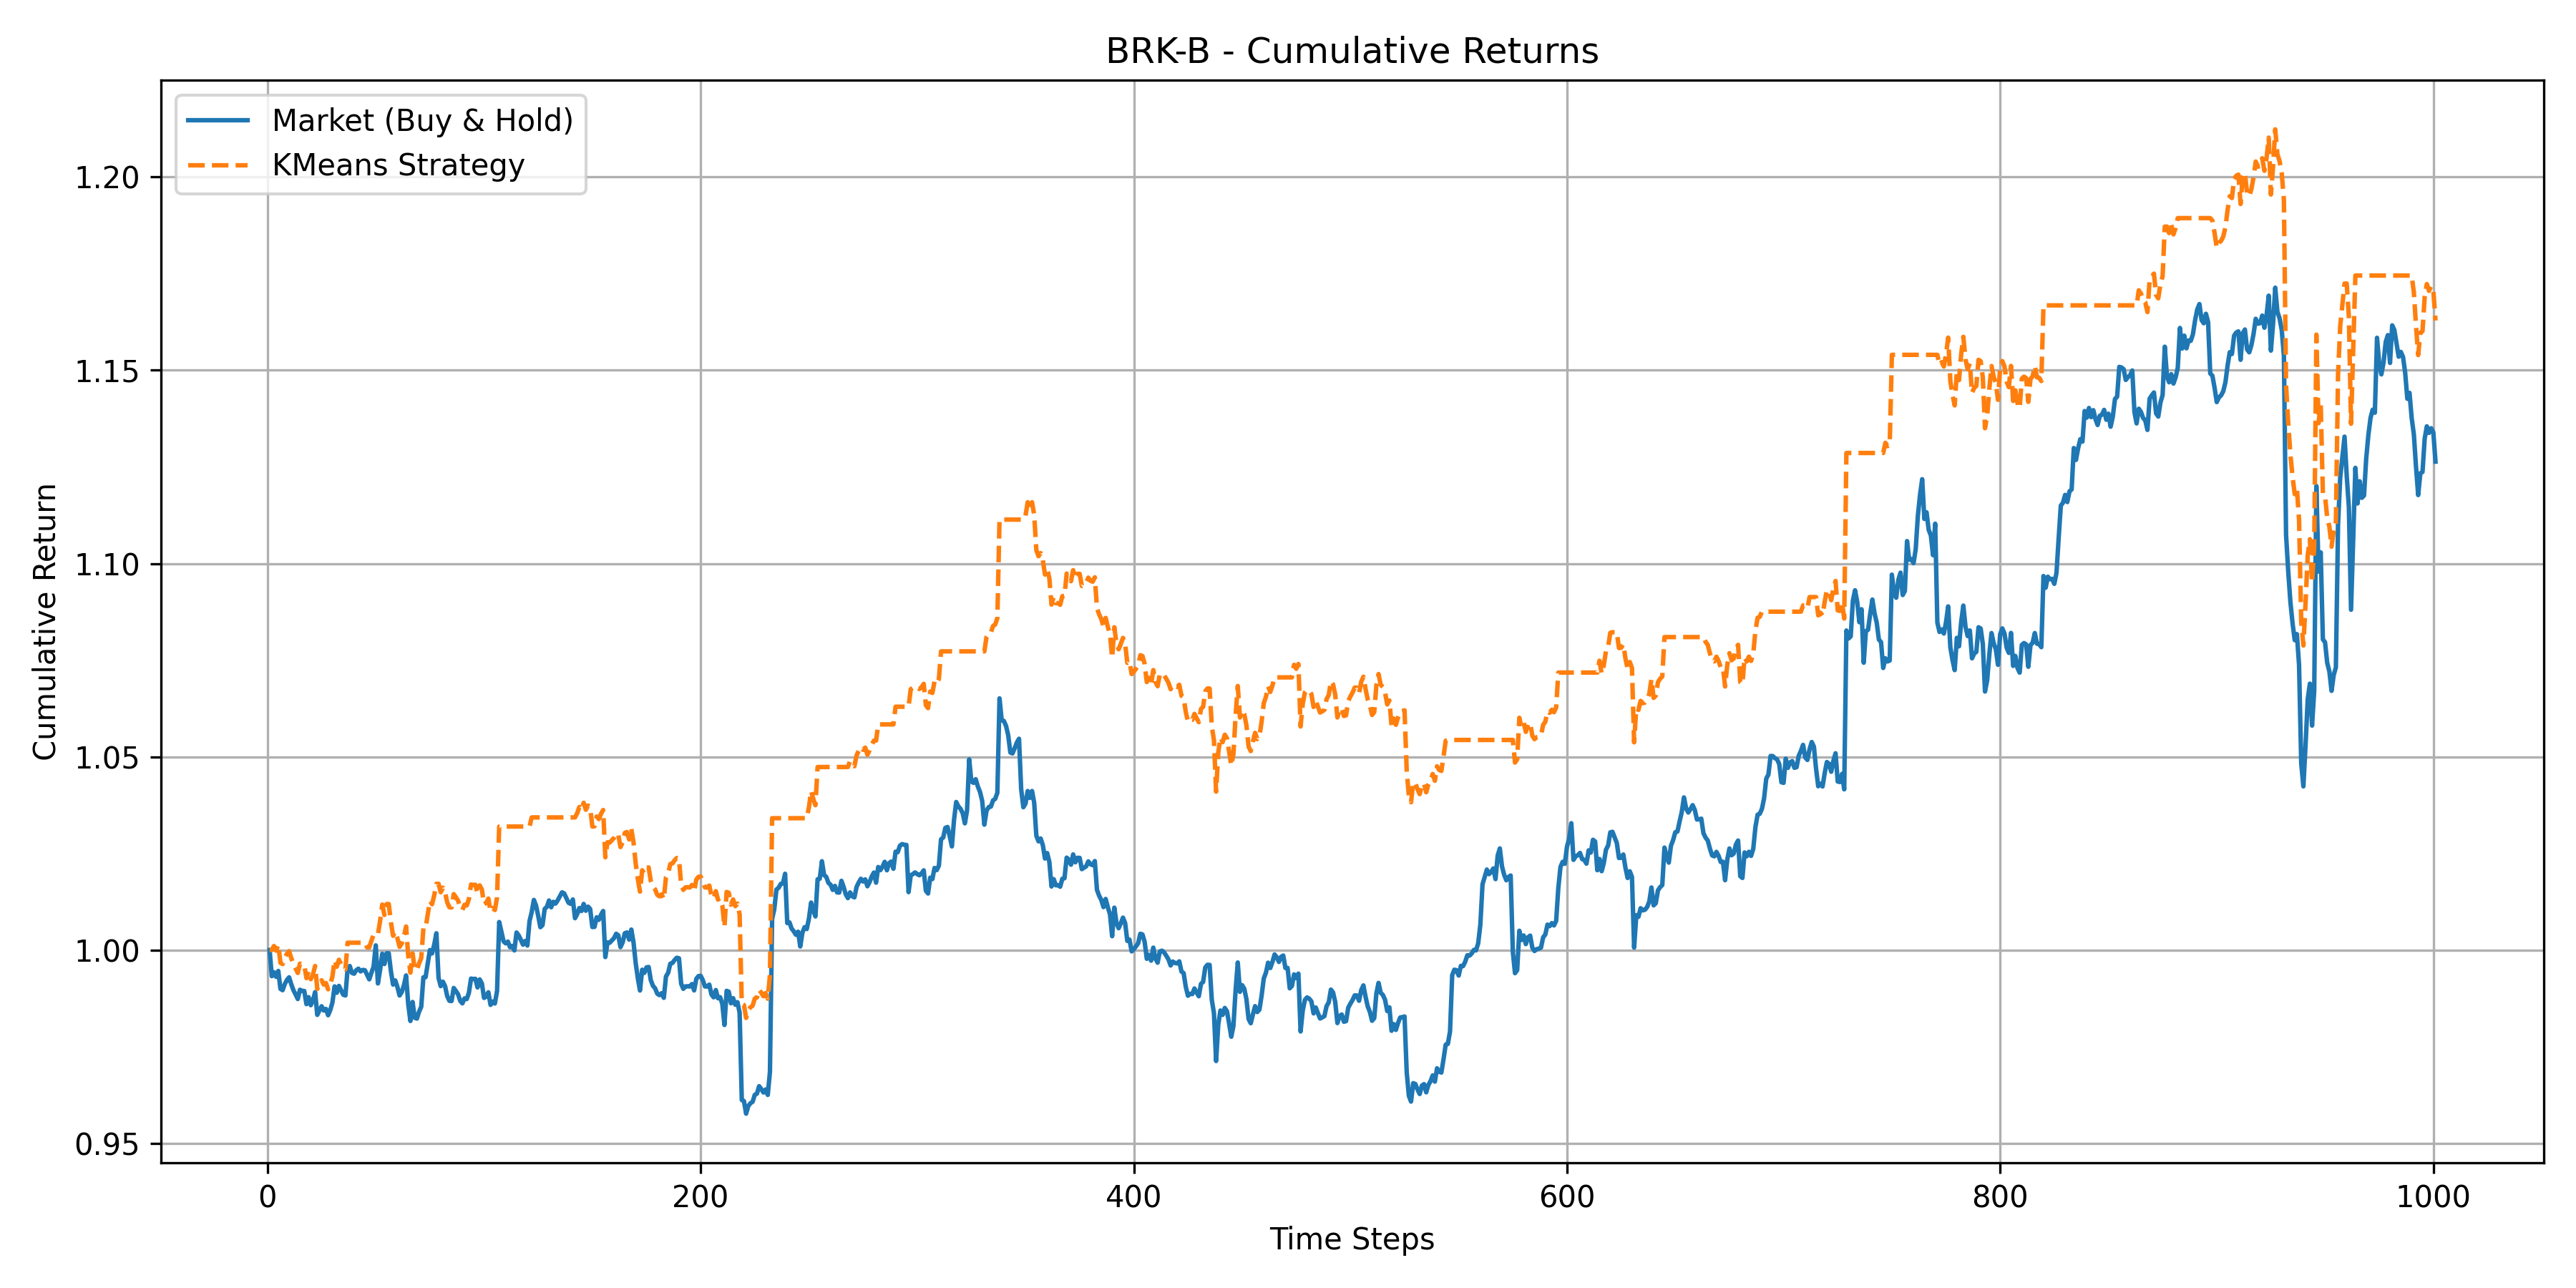

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

#Load summary (check both possible paths)
summary_path = (
    "results/kmeans_walkforward/summary_forward_return_remap.csv"
    if os.path.exists("results/kmeans_walkforward/summary_forward_return_remap.csv")
    else "results/kmeans_walkforward/summary.csv"
)
summary_df = pd.read_csv(summary_path)

#Ensure plot output directory exists
os.makedirs("results/kmeans_walkforward/plots", exist_ok=True)

#Top 5 tickers by strategy performance
top_tickers = summary_df.sort_values('Final Strategy', ascending=False).head(5)['Ticker']

for ticker in top_tickers:
    file_path = f"results/kmeans_walkforward/data/{ticker}_result.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        #Plot
        plt.figure(figsize=(12, 6))
        plt.plot(df['cumulative_market'], label='Market (Buy & Hold)', linestyle='-')
        plt.plot(df['cumulative_strategy'], label='KMeans Strategy', linestyle='--')
        plt.title(f"{ticker} - Cumulative Returns")
        plt.xlabel("Time Steps")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        #Save plot
        plot_path = f"results/kmeans_walkforward/plots/{ticker}_portfolio_plot.png"
        plt.savefig(plot_path, dpi=300)
        plt.show()
        plt.close()
        print(f"Plot saved for {ticker}: {plot_path}")
    else:
        print(f"Result CSV not found for {ticker}: {file_path}")

#Inline display of saved plots
for ticker in top_tickers:
    img_path = f"results/kmeans_walkforward/plots/{ticker}_portfolio_plot.png"
    if os.path.exists(img_path):
        print(f" {ticker}")
        display(Image(filename=img_path))
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

#Load summary (check both possible paths)
summary_path = (
    "results/kmeans_walkforward/summary_forward_return_remap.csv"
    if os.path.exists("results/kmeans_walkforward/summary_forward_return_remap.csv")
    else "results/kmeans_walkforward/summary.csv"
)
summary_df = pd.read_csv(summary_path)

#Ensure plot output directory exists
os.makedirs("results/kmeans_walkforward/plots", exist_ok=True)

#Top 5 tickers by strategy performance
top_tickers = summary_df.sort_values('Final Strategy', ascending=False).head(5)['Ticker']

for ticker in top_tickers:
    file_path = f"results/kmeans_walkforward/data/{ticker}_result.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        #Plot
        plt.figure(figsize=(12, 6))
        plt.plot(df['cumulative_market'], label='Market (Buy & Hold)', linestyle='-')
        plt.plot(df['cumulative_strategy'], label='KMeans Strategy', linestyle='--')
        plt.title(f"{ticker} - Cumulative Returns")
        plt.xlabel("Time Steps")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        #Save plot
        plot_path = f"results/kmeans_walkforward/plots/{ticker}_portfolio_plot.png"
        plt.savefig(plot_path, dpi=300)
        plt.show()
        plt.close()
        print(f"Plot saved for {ticker}: {plot_path}")
    else:
        print(f"Result CSV not found for {ticker}: {file_path}")

#Inline display of saved plots
for ticker in top_tickers:
    img_path = f"results/kmeans_walkforward/plots/{ticker}_portfolio_plot.png"
    if os.path.exists(img_path):
        print(f" {ticker}")
        display(Image(filename=img_path))


In [41]:
import os
import joblib
import json
import pandas as pd

def save_kmeans_results(
    stock,
    model,
    result_df,
    final_portfolio_value,
    kmeans_sharpe,
    kmeans_drawdown,
    signal_map,
    directory="results/kmeans_walkforward"
):
    #Ensure necessary folders exist
    os.makedirs(f"{directory}/models", exist_ok=True)
    os.makedirs(f"{directory}/data", exist_ok=True)
    os.makedirs(f"{directory}/signals", exist_ok=True)

    #Save KMeans model
    model_path = f"{directory}/models/{stock}_kmeans_model.pkl"
    joblib.dump(model, model_path)

    #Save walkforward results DataFrame
    result_path = f"{directory}/data/{stock}_result.csv"
    result_df.to_csv(result_path, index=False)

    #Save signal mapping
    signal_map_path = f"{directory}/signals/{stock}_signal_map.json"
    with open(signal_map_path, "w") as f:
        json.dump(signal_map, f, indent=4)

    #Update summary
    summary_row = {
        "Ticker": stock,
        "Final Portfolio Value": final_portfolio_value,
        "Sharpe": kmeans_sharpe,
        "Drawdown": kmeans_drawdown
    }

    summary_path = f"{directory}/summary_kmeans_saved.csv"
    if os.path.exists(summary_path):
        summary_df = pd.read_csv(summary_path)
        summary_df = summary_df[summary_df["Ticker"] != stock]  #remove duplicate entry
        summary_df = pd.concat([summary_df, pd.DataFrame([summary_row])], ignore_index=True)
    else:
        summary_df = pd.DataFrame([summary_row])

    summary_df.to_csv(summary_path, index=False)

    #Confirmation Output
    print(f"Saved KMeans results for {stock}")
    return {
        "ticker": stock,
        "model_path": model_path,
        "result_path": result_path,
        "signal_map_path": signal_map_path,
        "summary_path": summary_path,
        "saved": True
    }


In [42]:
#Dummy test data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

df = pd.DataFrame({
    "Close": np.random.rand(100),
    "RSI": np.random.rand(100),
    "MACD": np.random.rand(100),
    "OBV": np.random.rand(100),
    "cluster": np.random.randint(0, 3, size=100),
    "signal": np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    "cumulative_market": np.random.rand(100).cumsum(),
    "cumulative_strategy": np.random.rand(100).cumsum()
})

kmeans = KMeans(n_clusters=3).fit(df[["RSI", "MACD", "OBV"]])

save_kmeans_results(
    stock="TEST",
    model=kmeans,
    result_df=df,
    final_portfolio_value=123456,
    kmeans_sharpe=1.23,
    kmeans_drawdown=0.45,
    signal_map={0: "Buy", 1: "Hold", 2: "Sell"}
)


✅ Saved KMeans results for TEST


{'ticker': 'TEST',
 'model_path': 'results/kmeans_walkforward/models/TEST_kmeans_model.pkl',
 'result_path': 'results/kmeans_walkforward/data/TEST_result.csv',
 'signal_map_path': 'results/kmeans_walkforward/signals/TEST_signal_map.json',
 'summary_path': 'results/kmeans_walkforward/summary_kmeans_saved.csv',
 'saved': True}